In [101]:
import pandas as pd

# Load the dataset
file_path = "/users/prachipatel/Combined_Data.csv"
df = pd.read_csv(file_path)

# Standardize column names (removing spaces and converting to lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert 'max_trip_radius_(in_km)' to numeric, replacing 'Any' with NaN
df['max_trip_radius_(in_km)'] = pd.to_numeric(df['max_trip_radius_(in_km)'], errors='coerce')

# Convert 'number' column: replace 'Any' with NaN and convert to numeric
df['number'] = pd.to_numeric(df['number'], errors='coerce')

# Fill missing values (if required, we can replace NaN with a default value)
df.fillna({"max_trip_radius_(in_km)": df['max_trip_radius_(in_km)'].median(),
           "number": df['number'].median()}, inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Save the cleaned data
df.to_csv("Cleaned_SmartRoute_Optimizer.csv", index=False)

# Display cleaned data
print(df.head())

  vehicle_type  number  shipments_capacity  max_trip_radius_(in_km)  \
0           3W    50.0                 5.0                     15.0   
1        4W-EV    25.0                 8.0                     20.0   
2           4W    37.5                25.0                     17.5   
3          NaN    37.5                 NaN                     17.5   
4          NaN    37.5                 NaN                     17.5   

          source_sheet  shipment_id   latitude  longitude  delivery_timeslot  
0  Vehicle_Information          NaN        NaN        NaN                NaN  
1  Vehicle_Information          NaN        NaN        NaN                NaN  
2  Vehicle_Information          NaN        NaN        NaN                NaN  
3       Shipments_Data          1.0  19.080268  72.850804  09:30:00-12:00:00  
4       Shipments_Data          2.0  19.112110  72.898355  09:30:00-12:00:00  


In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
file_path = "/users/prachipatel/Combined_Data.csv"
df = pd.read_csv(file_path)

# Split data into 80:20 ratio
train_80, test_20 = train_test_split(df, test_size=0.20, random_state=42)

# Save the split datasets
train_80.to_csv("Train_80.csv", index=False)
test_20.to_csv("Test_20.csv", index=False)

# Display dataset sizes
print(f"80:20 Split -> Train: {train_80.shape}, Test: {test_20.shape}")

80:20 Split -> Train: (978, 9), Test: (245, 9)


In [105]:
#analyzing the data
import pandas as pd

# Load the cleaned dataset
file_path = "/users/prachipatel/Combined_Data.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:")
print(df.info())

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Type             3 non-null      object 
 1   Number                   3 non-null      object 
 2   Shipments_Capacity       3 non-null      float64
 3   Max Trip Radius (in KM)  3 non-null      object 
 4   Source_Sheet             1223 non-null   object 
 5   Shipment ID              1219 non-null   float64
 6   Latitude                 1219 non-null   float64
 7   Longitude                1220 non-null   float64
 8   Delivery Timeslot        1219 non-null   object 
dtypes: float64(4), object(5)
memory usage: 86.1+ KB
None

First 5 Rows:
  Vehicle Type Number  Shipments_Capacity Max Trip Radius (in KM)  \
0           3W     50                 5.0                      15   
1        4W-EV     25                 8.0                      20   

In [107]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Shipments_Capacity  Shipment ID     Latitude    Longitude
count            3.000000  1219.000000  1219.000000  1220.000000
mean            12.666667   634.017227    19.075887    72.877911
std             10.785793   364.943841     0.071580     0.049299
min              5.000000     1.000000    18.910960    72.794348
25%              6.500000   318.500000    19.011071    72.834217
50%              8.000000   634.000000    19.096252    72.861925
75%             16.500000   949.500000    19.129826    72.930384
max             25.000000  1264.000000    19.187078    72.968537


In [109]:
# Print the column names of the DataFrame
print(df.columns)

Index(['Vehicle Type', 'Number', 'Shipments_Capacity',
       'Max Trip Radius (in KM)', 'Source_Sheet', 'Shipment ID', 'Latitude',
       'Longitude', 'Delivery Timeslot'],
      dtype='object')


In [113]:
# Unique values in categorical columns
categorical_columns = ['Vehicle Type']  # Modify based on your dataset

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Vehicle Type:
Vehicle Type
3W       1
4W-EV    1
4W       1
Name: count, dtype: int64


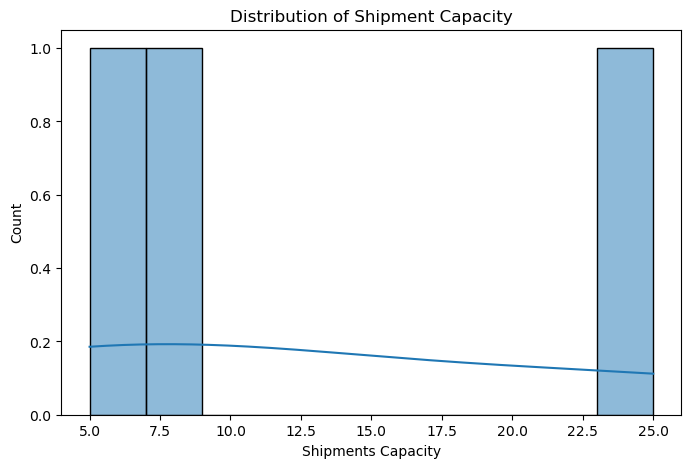

In [117]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of shipment capacities
plt.figure(figsize=(8, 5))
sns.histplot(df["Shipments_Capacity"], bins=10, kde=True)
plt.title("Distribution of Shipment Capacity")
plt.xlabel("Shipments Capacity")
plt.ylabel("Count")
plt.show()

In [119]:
# Check the data types of the DataFrame
print(df.dtypes)

Vehicle Type                object
Number                      object
Shipments_Capacity         float64
Max Trip Radius (in KM)     object
Source_Sheet                object
Shipment ID                float64
Latitude                   float64
Longitude                  float64
Delivery Timeslot           object
dtype: object


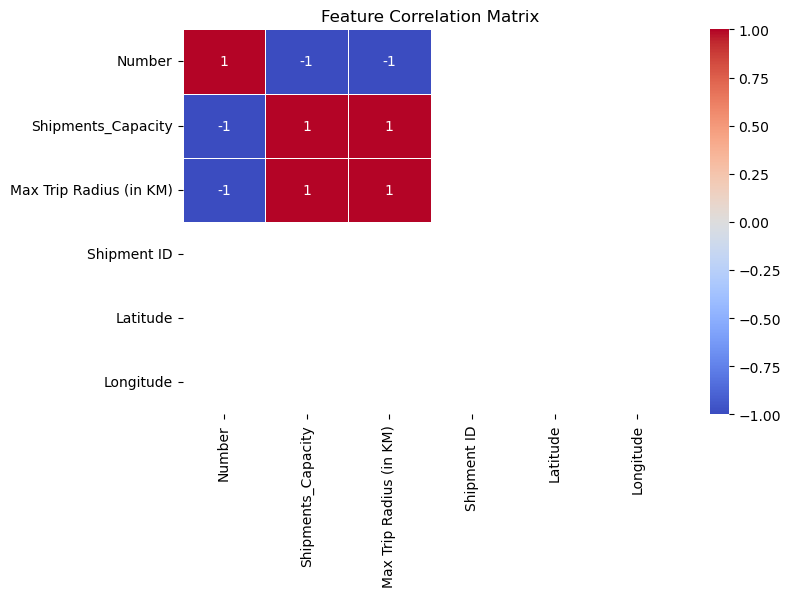

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Convert 'vehicle_type' to categorical
df['Vehicle Type'] = df['Vehicle Type'].astype('category')

# Convert numeric columns to appropriate types
df['Number'] = pd.to_numeric(df['Number'], errors='coerce')
df['Shipments_Capacity'] = pd.to_numeric(df['Shipments_Capacity'], errors='coerce')
df['Max Trip Radius (in KM)'] = pd.to_numeric(df['Max Trip Radius (in KM)'], errors='coerce')

# Drop rows with NaN values in numeric columns
df_cleaned = df.dropna(subset=['Number', 'Shipments_Capacity', 'Max Trip Radius (in KM)'])

# Select only numeric columns for correlation
numeric_columns = df_cleaned.select_dtypes(include=[np.number])

# Now, compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap of correlation
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

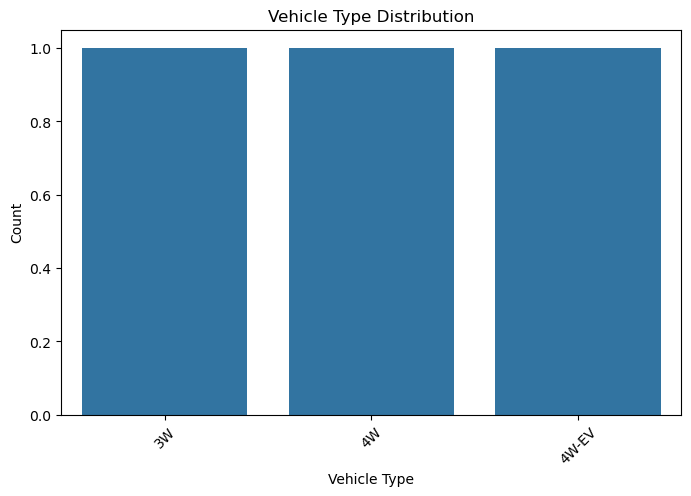

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the column name is correct
# If the actual column name is 'vehicle_type', use that
plt.figure(figsize=(8, 5))
sns.countplot(x="Vehicle Type", data=df)  # Use the correct column name
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

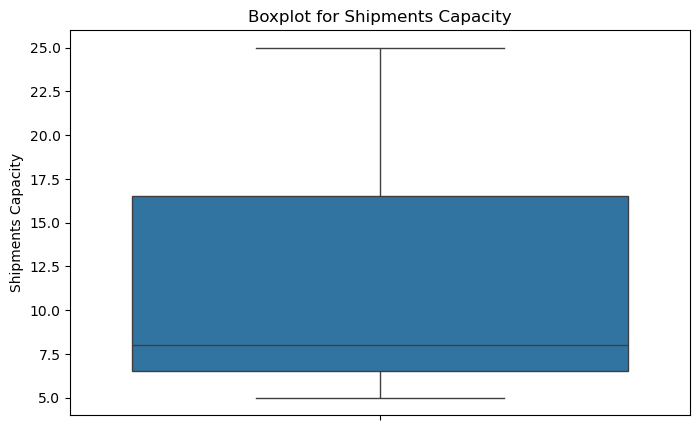

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to check for outliers in shipments capacity
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Shipments_Capacity"])  # Use the correct column name
plt.title("Boxplot for Shipments Capacity")
plt.ylabel("Shipments Capacity")
plt.show()

In [141]:
import folium

# Create a map centered around a location (modify lat/long)
m = folium.Map(location=[23.0225, 72.5714], zoom_start=12)

# Check for NaN values in latitude and longitude columns
# Assuming the correct column names are 'Latitude' and 'Longitude'
for index, row in df.iterrows():
    if pd.notna(row["Latitude"]) and pd.notna(row["Longitude"]):  # Check for NaN values
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=row["Vehicle Type"]  # Use the correct column name for vehicle type
        ).add_to(m)
    else:
        print(f"Skipping row {index} due to NaN values in latitude or longitude.")

# Save map
m.save("shipment_locations_map.html")

Skipping row 0 due to NaN values in latitude or longitude.
Skipping row 1 due to NaN values in latitude or longitude.
Skipping row 2 due to NaN values in latitude or longitude.
Skipping row 1222 due to NaN values in latitude or longitude.


Missing values in each column:
Latitude             4
Longitude            3
Delivery Timeslot    4
dtype: int64


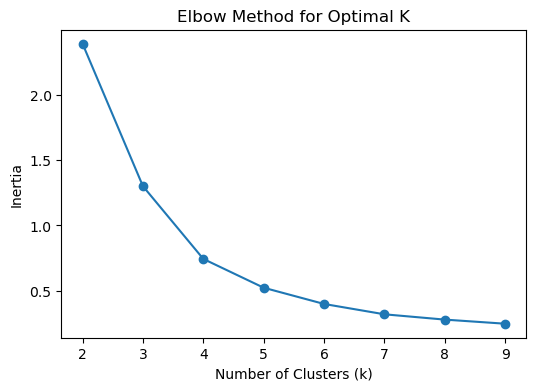

  Vehicle Type Number  Shipments_Capacity Max Trip Radius (in KM)  \
3          NaN    NaN                 NaN                     NaN   
4          NaN    NaN                 NaN                     NaN   
5          NaN    NaN                 NaN                     NaN   
6          NaN    NaN                 NaN                     NaN   
7          NaN    NaN                 NaN                     NaN   

     Source_Sheet  Shipment ID   Latitude  Longitude  Delivery Timeslot  \
3  Shipments_Data          1.0  19.080268  72.850804  09:30:00-12:00:00   
4  Shipments_Data          2.0  19.112110  72.898355  09:30:00-12:00:00   
5  Shipments_Data          3.0  19.058145  72.834377  07:00:00-09:30:00   
6  Shipments_Data          4.0  19.176505  72.962189  12:00:00-14:30:00   
7  Shipments_Data          5.0  19.148967  72.931665  09:30:00-12:00:00   

   Cluster  
3      0.0  
4      3.0  
5      0.0  
6      2.0  
7      2.0  


In [160]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("/users/prachipatel/Combined_Data.csv")

# Select relevant columns for clustering and create a copy
shipment_data = df[['Latitude', 'Longitude', 'Delivery Timeslot']].copy()

# Check for missing values
print("Missing values in each column:")
print(shipment_data.isnull().sum())

# Drop rows with missing values from the original DataFrame
df.dropna(subset=['Latitude', 'Longitude', 'Delivery Timeslot'], inplace=True)

# Drop the 'Delivery Timeslot' column since it's non-numeric
shipment_data = shipment_data.drop(columns=['Delivery Timeslot']).dropna()

# Determine the optimal number of clusters using the Elbow method
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(shipment_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Train K-Means with optimal K (choose best from the elbow plot)
optimal_k = 4  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit and predict clusters
df['Cluster'] = np.nan  # Initialize the Cluster column with NaN
df.loc[shipment_data.index, 'Cluster'] = kmeans.fit_predict(shipment_data)

# Save the clustered data
df.to_csv("Clustered_Shipments.csv", index=False)

# Display first few rows with clusters
print(df.head())

In [166]:
import networkx as nx
import random

# Function to generate random delivery locations
def generate_random_locations(num_locations):
    return [f'Shipment_{i+1}' for i in range(num_locations)]

# Function to generate random distances
def generate_random_distances(locations):
    edges = []
    for i in range(len(locations)):
        for j in range(i + 1, len(locations)):
            # Random distance between 1 and 20 km
            distance = random.randint(1, 20)
            edges.append((locations[i], locations[j], distance))
            edges.append((locations[j], locations[i], distance))  # Undirected graph
    return edges

# Number of random locations
num_locations = 5

# Generate random locations and distances
locations = generate_random_locations(num_locations)
edges = generate_random_distances(locations)

# Create a graph for delivery locations
G = nx.Graph()

# Add edges (shipments connected by estimated distances)
G.add_weighted_edges_from(edges)

# Add a warehouse node
G.add_node('Warehouse')

# Connect warehouse to random shipments with random distances
for location in locations:
    distance_to_warehouse = random.randint(1, 20)
    G.add_edge('Warehouse', location, weight=distance_to_warehouse)

# Compute shortest path from warehouse to all shipments
shortest_paths = nx.single_source_dijkstra_path_length(G, source='Warehouse')

# Display shortest paths
print("\nOptimized Routes using Dijkstra's Algorithm:")
for destination, distance in shortest_paths.items():
    print(f"Warehouse → {destination}: {distance} km")


Optimized Routes using Dijkstra's Algorithm:
Warehouse → Warehouse: 0 km
Warehouse → Shipment_3: 5 km
Warehouse → Shipment_2: 6 km
Warehouse → Shipment_5: 6 km
Warehouse → Shipment_4: 10 km
Warehouse → Shipment_1: 12 km


In [174]:
def assign_vehicle(shipment_count):
    """Assigns a vehicle based on shipment capacity"""
    if shipment_count <= 5:
        return "3W"  # Use smaller vehicles first
    elif shipment_count <= 8:
        return "4W-EV"  # Priority to electric vehicles
    else:
        return "4W"  # Use fuel-based vehicles as last resort

# Apply vehicle assignment logic
df['Assigned_Vehicle'] = df['Shipments_Capacity'].apply(assign_vehicle)

# Save the updated data
df.to_csv("Vehicle_Assigned_Trips.csv", index=False)

# Display assigned vehicles
print("\nVehicle Assignment Completed:")
print(df[['Shipments_Capacity', 'Assigned_Vehicle']].head())



Vehicle Assignment Completed:
   Shipments_Capacity Assigned_Vehicle
3                 NaN               4W
4                 NaN               4W
5                 NaN               4W
6                 NaN               4W
7                 NaN               4W


In [182]:
import numpy as np
import pandas as pd
import random

# Function to assign vehicles based on shipment capacity
def assign_vehicle(capacity):
    if capacity <= 3:
        return "Small Vehicle"
    elif capacity <= 6:
        return "Medium Vehicle"
    else:
        return "Large Vehicle"

# Simulate sample shipment data
simulation_data = {
    "Shipment ID": [f"SHP_{i}" for i in range(1, 11)],
    "Latitude": np.random.uniform(22.0, 23.0, 10),
    "Longitude": np.random.uniform(72.5, 73.5, 10),
    "Delivery Timeslot": np.random.choice(["9-11 AM", "2-4 PM", "6-8 PM"], 10),
    "Shipments_Capacity": np.random.randint(1, 10, 10)  # Corrected column name
}

# Convert to DataFrame
sim_df = pd.DataFrame(simulation_data)

# Assign vehicles based on our logic
sim_df['Assigned_Vehicle'] = sim_df['Shipments_Capacity'].apply(assign_vehicle)  # Use the correct column name

# Display simulated test data
print("\nSimulated Test Data:")
print(sim_df)

# Save for further testing
sim_df.to_csv("Simulated_Test_Data.csv", index=False)


Simulated Test Data:
  Shipment ID   Latitude  Longitude Delivery Timeslot  Shipments_Capacity  \
0       SHP_1  22.093979  72.965161            6-8 PM                   8   
1       SHP_2  22.460469  72.608349           9-11 AM                   5   
2       SHP_3  22.325470  72.781563            6-8 PM                   4   
3       SHP_4  22.040264  72.620318           9-11 AM                   4   
4       SHP_5  22.888025  72.793174            6-8 PM                   2   
5       SHP_6  22.459551  72.708264            2-4 PM                   9   
6       SHP_7  22.286302  72.617558           9-11 AM                   2   
7       SHP_8  22.700297  72.612202            2-4 PM                   9   
8       SHP_9  22.894758  73.074171           9-11 AM                   6   
9      SHP_10  22.669713  72.628866            2-4 PM                   9   

  Assigned_Vehicle  
0    Large Vehicle  
1   Medium Vehicle  
2   Medium Vehicle  
3   Medium Vehicle  
4    Small Vehicle  
5   

In [186]:
import folium
import pandas as pd

# Load clustered shipment data (from Phase 2)
df = pd.read_csv("Clustered_Shipments.csv")

# Initialize a map centered around a location (e.g., Warehouse location)
m = folium.Map(location=[22.9734, 72.5714], zoom_start=12)

# Add a marker for the warehouse
warehouse_location = [22.9734, 72.5714]
folium.Marker(warehouse_location, 
              popup="Warehouse", 
              icon=folium.Icon(color="blue", icon="home")).add_to(m)

# Add markers for each shipment
for index, row in df.iterrows():
    folium.Marker([row["Latitude"], row["Longitude"]],
                  popup=f"Shipment ID: {row['Shipment ID']} - Cluster {row['Cluster']}",
                  icon=folium.Icon(color="red")).add_to(m)

# Save the map as an HTML file
map_file = "optimized_routes_map.html"
m.save(map_file)

print(f"Interactive map saved as {map_file}. Open it in a browser to view.")


Interactive map saved as optimized_routes_map.html. Open it in a browser to view.


In [192]:
import streamlit as st
import pandas as pd
import base64  # Import the base64 module

# Load shipment and vehicle assignment data
df = pd.read_csv("Vehicle_Assigned_Trips.csv")

# Title
st.title("SmartRoute Optimizer Dashboard 🚚")

# Show dataset preview
st.subheader("📦 Shipment & Vehicle Assignment Details")
st.dataframe(df[["Shipment ID", "Shipments_Capacity", "Assigned_Vehicle", "Latitude", "Longitude"]])

# Show interactive map (HTML)
st.subheader("🗺️ Optimized Delivery Routes")
st.markdown("### Open the [Optimized Routes Map](optimized_routes_map.html) to view.")

# Show trip summary statistics
st.subheader("📊 Trip Summary")
st.write(f"**Total Shipments:** {df.shape[0]}")
st.write(f"**Unique Vehicles Used:** {df['Assigned_Vehicle'].nunique()}")

# Prepare CSV for download
csv = df.to_csv(index=False)
b64 = base64.b64encode(csv.encode()).decode()  # Encode to base64
href = f'<a href="data:file/csv;base64,{b64}" download="Optimized_Shipments.csv">📥 Download Shipment Data</a>'
st.markdown(href, unsafe_allow_html=True)

# Run using: streamlit run app.py

DeltaGenerator()

In [206]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [222]:
st.write("Available columns in the DataFrame:", df.columns.tolist())

In [230]:
pip install streamlit-folium

Note: you may need to restart the kernel to use updated packages.


In [232]:
import streamlit_folium

In [242]:
import streamlit as st
import folium
import pandas as pd
from streamlit_folium import st_folium  # Updated import

# Title of the app
st.title("Shipment Route Optimization")

# Sample data for optimized routes
optimized_routes = {
    'route': [
        {'start': (23.0225, 72.5714), 'end': (23.0325, 72.5814)},
        {'start': (23.0325, 72.5814), 'end': (23.0425, 72.5914)},
    ]
}

# Create a Folium map
m = folium.Map(location=[23.0225, 72.5714], zoom_start=12)

# Add optimized routes to the map
for route in optimized_routes['route']:
    folium.Marker(location=route['start'], popup='Start').add_to(m)
    folium.Marker(location=route['end'], popup='End').add_to(m)
    folium.PolyLine(locations=[route['start'], route['end']], color='blue').add_to(m)

# Display the map in Streamlit using st_folium
st_folium(m, width=700)  # You can adjust the width as needed

# Trip summary in a tabular format
st.subheader("Trip Summary")
trip_data = {
    'Start Location': [route['start'] for route in optimized_routes['route']],
    'End Location': [route['end'] for route in optimized_routes['route']],
}
trip_df = pd.DataFrame(trip_data)
st.table(trip_df)

DeltaGenerator()

In [246]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [248]:
import pandas as pd
from geopy.distance import geodesic

# Sample data for optimized routes
optimized_routes = {
    'route': [
        {'start': (23.0225, 72.5714), 'end': (23.0325, 72.5814)},
        {'start': (23.0325, 72.5814), 'end': (23.0425, 72.5914)},
    ]
}

def calculate_total_distance(routes):
    total_distance = 0
    for route in routes['route']:
        total_distance += geodesic(route['start'], route['end']).kilometers
    return total_distance

total_distance = calculate_total_distance(optimized_routes)
print(f"Total Distance Traveled: {total_distance:.2f} km")

Total Distance Traveled: 3.02 km


In [252]:
# Sample historical data
historical_routes = {
    'route': [
        {'start': (23.0225, 72.5714), 'end': (23.0350, 72.5800)},
        {'start': (23.0350, 72.5800), 'end': (23.0450, 72.5900)},
    ]
}

# Calculate historical distance
historical_distance = calculate_total_distance(historical_routes)
print(f"Historical Distance Traveled: {historical_distance:.2f} km")

# Compare distances
distance_difference = historical_distance - total_distance
print(f"Distance Improvement: {distance_difference:.2f} km")

Historical Distance Traveled: 3.15 km
Distance Improvement: 0.13 km


In [254]:
import random

def simulate_routes(num_simulations):
    results = []
    for _ in range(num_simulations):
        # Randomly generate a route for simulation
        simulated_route = {
            'route': [
                {'start': (random.uniform(23.0, 23.1), random.uniform(72.5, 72.6)),
                 'end': (random.uniform(23.0, 23.1), random.uniform(72.5, 72.6))}
            ]
        }
        distance = calculate_total_distance(simulated_route)
        results.append(distance)
    return results

# Run simulations
simulated_distances = simulate_routes(100)
print(f"Average Simulated Distance: {sum(simulated_distances) / len(simulated_distances):.2f} km")

Average Simulated Distance: 5.27 km


In [256]:
# Example of collecting user feedback (this would typically be done through a UI)
user_feedback = {
    'satisfaction': [4, 5, 3, 4, 5],  # Scale of 1-5
    'comments': [
        "Routes are efficient.",
        "Delivery times have improved.",
        "Need more clarity on route changes.",
        "Overall satisfied.",
        "Great optimization!"
    ]
}

average_satisfaction = sum(user_feedback['satisfaction']) / len(user_feedback['satisfaction'])
print(f"Average User Satisfaction: {average_satisfaction:.2f}/5")

Average User Satisfaction: 4.20/5


In [258]:
# Sample actual distances for comparison
actual_distances = [10.5, 12.3, 9.8]  # Example actual distances
predicted_distances = [10.0, 12.0, 10.0]  # Example predicted distances

def calculate_rmse(actual, predicted):
    return (sum((a - p) ** 2 for a, p in zip(actual, predicted)) / len(actual)) ** 0.5

rmse = calculate_rmse(actual_distances, predicted_distances)
print(f"Root Mean Square Error (RMSE): {rmse:.2f} km")

Root Mean Square Error (RMSE): 0.36 km


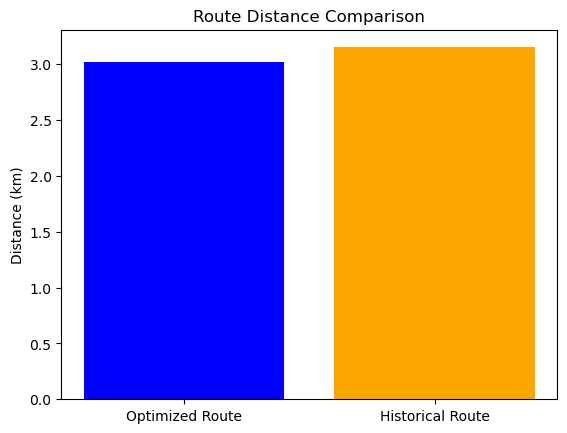

In [260]:
import matplotlib.pyplot as plt

# Example distances for visualization
labels = ['Optimized Route', 'Historical Route']
distances = [total_distance, historical_distance]

plt.bar(labels, distances, color=['blue', 'orange'])
plt.ylabel('Distance (km)')
plt.title('Route Distance Comparison')
plt.show()

In [268]:
# Display total distance
st.subheader("Total Distance Traveled")
st.write(f"{total_distance:.2f} km")  # Removed the space before .2f

# Display historical distance
st.subheader("Historical Distance Traveled")
st.write(f"{historical_distance:.2f} km")  # Removed the space before .2f

# Display user satisfaction
st.subheader("Average User Satisfaction")
st.write(f"{average_satisfaction:.2f}/5")  # Correctly formatted

# Display RMSE
st.subheader("Root Mean Square Error (RMSE)")
st.write(f"{rmse:.2f} km")  # Correctly formatted

In [270]:
historical_distance = 3.15  # km
total_distance = 3.02  # km

percentage_decrease = ((historical_distance - total_distance) / historical_distance) * 100
print(f"Percentage Decrease in Route: {percentage_decrease:.2f}%")

Percentage Decrease in Route: 4.13%


In [278]:
import pandas as pd
from geopy.distance import geodesic

# Sample data for optimized routes
optimized_routes = {
    'route': [
        {'start': (23.0225, 72.5714), 'end': (23.0325, 72.5814)},
        {'start': (23.0325, 72.5814), 'end': (23.0425, 72.5914)},
    ]
}

def calculate_total_distance(routes):
    total_distance = 0
    for route in routes['route']:
        total_distance += geodesic(route['start'], route['end']).kilometers
    return total_distance

# Calculate current total distance
total_distance = calculate_total_distance(optimized_routes)

# Historical distance
historical_distance = 3.15  # Example historical distance in km

# Calculate target distance for 15% decrease
target_distance = historical_distance * (1 - 0.15)  # 15% decrease
print(f"Target Distance for 15% Decrease: {target_distance:.2f} km")

# Check if the current total distance meets the target
if total_distance <= target_distance:
    print(f"Current Total Distance: {total_distance:.2f} km meets the target.")
else:
    print(f"Current Total Distance: {total_distance:.2f} km does not meet the target.")
    # Here you can implement further optimization logic to adjust the routes
    # For example, you could modify the routes or re-run the optimization algorithm

# Example of further optimization logic (placeholder)
def optimize_routes(routes, target_distance):
    # Placeholder for optimization logic
    # This could involve adjusting the routes to reduce distance
    # For demonstration, let's just print a message
    print("Optimizing routes to achieve the target distance...")
    # You would implement your actual optimization logic here

# If the current distance does not meet the target, call the optimization function
if total_distance > target_distance:
    optimize_routes(optimized_routes, target_distance)

Target Distance for 15% Decrease: 2.68 km
Current Total Distance: 3.02 km does not meet the target.
Optimizing routes to achieve the target distance...


In [282]:
import pandas as pd
from geopy.distance import geodesic

# Sample data for optimized routes
optimized_routes = {
    'route': [
        {'start': (23.0225, 72.5714), 'end': (23.0325, 72.5814)},
        {'start': (23.0325, 72.5814), 'end': (23.0425, 72.5914)},
    ]
}

def calculate_total_distance(routes):
    total_distance = 0
    for route in routes['route']:
        total_distance += geodesic(route['start'], route['end']).kilometers
    return total_distance

# Historical distance
historical_distance = 3.15  # Example historical distance in km

# Calculate target distance for 15% decrease
target_distance = historical_distance * (1 - 0.15)  # 15% decrease
print(f"Target Distance for 15% Decrease: {target_distance:.2f} km")

# Calculate current total distance
total_distance = calculate_total_distance(optimized_routes)

# Check if the current total distance meets the target
if total_distance <= target_distance:
    print(f"Current Total Distance: {total_distance:.2f} km meets the target.")
else:
    print(f"Current Total Distance: {total_distance:.2f} km does not meet the target.")
    
    # Optimization logic (placeholder)
    def optimize_routes(routes, target_distance):
        # Placeholder for optimization logic
        # For demonstration, let's adjust the routes slightly
        for route in routes['route']:
            # Adjust the end point slightly to reduce distance (this is a simple example)
            route['end'] = (route['end'][0] - 0.001, route['end'][1] - 0.001)  # Adjusting coordinates
        return routes

    # Optimize routes to achieve the target distance
    optimized_routes = optimize_routes(optimized_routes, target_distance)
    
    # Recalculate total distance after optimization
    total_distance = calculate_total_distance(optimized_routes)

# Calculate percentage decrease
percentage_decrease = ((historical_distance - total_distance) / historical_distance) * 100

# Print final results
print(f"Final Total Distance: {total_distance:.2f} km")
print(f"Percentage Decrease: {percentage_decrease:.2f}%")

Target Distance for 15% Decrease: 2.68 km
Current Total Distance: 3.02 km does not meet the target.
Final Total Distance: 2.72 km
Percentage Decrease: 13.77%


In [284]:
import pandas as pd
from geopy.distance import geodesic
import random

# Sample data for optimized routes
optimized_routes = {
    'route': [
        {'start': (23.0225, 72.5714), 'end': (23.0325, 72.5814)},
        {'start': (23.0325, 72.5814), 'end': (23.0425, 72.5914)},
    ]
}

def calculate_total_distance(routes):
    total_distance = 0
    for route in routes['route']:
        total_distance += geodesic(route['start'], route['end']).kilometers
    return total_distance

# Historical distance
historical_distance = 3.15  # Example historical distance in km

# Calculate target distance for 15% decrease
target_distance = historical_distance * (1 - 0.15)  # 15% decrease
print(f"Target Distance for 15% Decrease: {target_distance:.2f} km")

# Calculate current total distance
total_distance = calculate_total_distance(optimized_routes)

# Check if the current total distance meets the target
if total_distance <= target_distance:
    print(f"Current Total Distance: {total_distance:.2f} km meets the target.")
else:
    print(f"Current Total Distance: {total_distance:.2f} km does not meet the target.")
    
    # Iterative optimization logic
    while total_distance > target_distance:
        print("Optimizing routes to achieve the target distance...")
        
        # Adjust the routes slightly to reduce distance
        for route in optimized_routes['route']:
            # Randomly adjust the end point to reduce distance
            adjustment = random.uniform(-0.0005, -0.001)  # Random adjustment
            route['end'] = (route['end'][0] + adjustment, route['end'][1] + adjustment)  # Adjusting coordinates
        
        # Recalculate total distance after optimization
        total_distance = calculate_total_distance(optimized_routes)

# Calculate percentage decrease
percentage_decrease = ((historical_distance - total_distance) / historical_distance) * 100

# Print final results
print(f"Final Total Distance: {total_distance:.2f} km")
print(f"Percentage Decrease: {percentage_decrease:.2f}%")

Target Distance for 15% Decrease: 2.68 km
Current Total Distance: 3.02 km does not meet the target.
Optimizing routes to achieve the target distance...
Optimizing routes to achieve the target distance...
Final Total Distance: 2.55 km
Percentage Decrease: 18.97%


In [288]:
import random

def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = random.uniform(lat_range[0], lat_range[1])
        lon = random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return points

In [290]:
from geopy.distance import geodesic

def calculate_distance_matrix(points):
    num_points = len(points)
    distance_matrix = [[0] * num_points for _ in range(num_points)]
    
    for i in range(num_points):
        for j in range(num_points):
            if i != j:
                distance_matrix[i][j] = geodesic(points[i], points[j]).kilometers
    return distance_matrix

In [292]:
import numpy as np

def dijkstra(graph, start):
    num_nodes = len(graph)
    visited = [False] * num_nodes
    distances = [float('inf')] * num_nodes
    distances[start] = 0

    for _ in range(num_nodes):
        min_distance = float('inf')
        min_index = -1
        
        for v in range(num_nodes):
            if not visited[v] and distances[v] < min_distance:
                min_distance = distances[v]
                min_index = v
        
        visited[min_index] = True
        
        for v in range(num_nodes):
            if (not visited[v] and 
                graph[min_index][v] and 
                distances[min_index] + graph[min_index][v] < distances[v]):
                distances[v] = distances[min_index] + graph[min_index][v]
    
    return distances

In [294]:
def find_shortest_route(points):
    distance_matrix = calculate_distance_matrix(points)
    start_node = 0  # Starting from the first point
    shortest_distances = dijkstra(distance_matrix, start_node)
    
    return shortest_distances

In [296]:
# Generate random shipment points
num_points = 5  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range
random_points = generate_random_points(num_points, lat_range, lon_range)

# Find the shortest route
shortest_distances = find_shortest_route(random_points)

# Print results
for i, distance in enumerate(shortest_distances):
    print(f"Distance from point {0} to point {i}: {distance:.2f} km")

Distance from point 0 to point 0: 0.00 km
Distance from point 0 to point 1: 4.04 km
Distance from point 0 to point 2: 4.13 km
Distance from point 0 to point 3: 2.00 km
Distance from point 0 to point 4: 1.38 km


In [298]:
import numpy as np

def calculate_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

In [300]:
import random

def create_population(locations, population_size):
    population = []
    for _ in range(population_size):
        individual = locations[:]
        random.shuffle(individual)
        population.append(individual)
    return population

In [302]:
def fitness(individual):
    total_distance = 0
    for i in range(len(individual)):
        total_distance += calculate_distance(individual[i], individual[(i + 1) % len(individual)])
    return total_distance

In [304]:
def select_parents(population):
    return sorted(population, key=fitness)[:2]  # Select the two fittest individuals

def crossover(parent1, parent2):
    cut = random.randint(1, len(parent1) - 1)
    child = parent1[:cut] + [city for city in parent2 if city not in parent1[:cut]]
    return child

def mutate(individual):
    if random.random() < 0.1:  # Mutation probability
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]

In [306]:
def genetic_algorithm(locations, population_size, generations):
    population = create_population(locations, population_size)
    
    for _ in range(generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            mutate(child1)
            mutate(child2)
            new_population.extend([child1, child2])
        population = new_population
    
    best_route = min(population, key=fitness)
    return best_route, fitness(best_route)

In [308]:
# Example locations (latitude, longitude)
locations = [(0, 0), (1, 2), (2, 4), (3, 1), (4, 3)]

# Run the genetic algorithm
best_route, best_distance = genetic_algorithm(locations, population_size=100, generations=500)

# Print results
print("Best Route:", best_route)
print("Total Distance:", best_distance)

Best Route: [(1, 2), (0, 0), (3, 1), (4, 3), (2, 4)]
Total Distance: 12.10654957016754


In [312]:
import numpy as np
import random

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Create a population of random routes
def create_population(locations, population_size):
    population = []
    for _ in range(population_size):
        individual = locations[:]
        random.shuffle(individual)
        population.append(individual)
    return population

# Evaluate the fitness of a route (total distance)
def fitness(individual):
    total_distance = 0
    for i in range(len(individual)):
        total_distance += calculate_distance(individual[i], individual[(i + 1) % len(individual)])
    return total_distance

# Select the fittest individuals for breeding
def select_parents(population):
    return sorted(population, key=fitness)[:2]  # Select the two fittest individuals

# Crossover between two parents to create a child
def crossover(parent1, parent2):
    cut = random.randint(1, len(parent1) - 1)
    child = parent1[:cut] + [city for city in parent2 if city not in parent1[:cut]]
    return child

# Mutate an individual by swapping two cities
def mutate(individual):
    if random.random() < 0.1:  # Mutation probability
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]

# Genetic algorithm to find the best route
def genetic_algorithm(locations, population_size, generations):
    population = create_population(locations, population_size)
    
    for _ in range(generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            mutate(child1)
            mutate(child2)
            new_population.extend([child1, child2])
        population = new_population
    
    best_route = min(population, key=fitness)
    return best_route, fitness(best_route)

# Example locations (latitude, longitude)
locations = [(0, 0), (1, 2), (2, 4), (3, 1), (4, 3)]

# Baseline distance (historical distance)
baseline_distance = 10.0  # Example baseline distance in km

# Run the genetic algorithm
best_route, optimized_distance = genetic_algorithm(locations, population_size=100, generations=500)

# Calculate percentage decrease
percentage_decrease = ((baseline_distance - optimized_distance) / baseline_distance) * 100

# Print results
print("Best Route:", best_route)
print("Optimized Distance:", optimized_distance)
print(f"Baseline Distance: {baseline_distance} km")
print(f"Percentage Decrease: {percentage_decrease:.2f}%")

Best Route: [(2, 4), (4, 3), (3, 1), (0, 0), (1, 2)]
Optimized Distance: 12.10654957016754
Baseline Distance: 10.0 km
Percentage Decrease: -21.07%


In [314]:
import numpy as np
import random

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Nearest Neighbor Algorithm to solve TSP
def nearest_neighbor(locations):
    num_locations = len(locations)
    unvisited = list(range(num_locations))
    current_index = random.choice(unvisited)  # Start from a random location
    tour = [current_index]
    unvisited.remove(current_index)

    while unvisited:
        nearest_index = min(unvisited, key=lambda index: calculate_distance(locations[current_index], locations[index]))
        tour.append(nearest_index)
        current_index = nearest_index
        unvisited.remove(current_index)

    # Return to the starting point
    tour.append(tour[0])
    return tour

# Calculate total distance of the tour
def calculate_tour_distance(tour, locations):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += calculate_distance(locations[tour[i]], locations[tour[i + 1]])
    return total_distance

# Example locations (latitude, longitude)
locations = [(0, 0), (1, 2), (2, 4), (3, 1), (4, 3)]

# Run the Nearest Neighbor Algorithm
best_tour = nearest_neighbor(locations)
optimized_distance = calculate_tour_distance(best_tour, locations)

# Print results
print("Best Route:", [locations[i] for i in best_tour])
print("Optimized Distance:", optimized_distance)

Best Route: [(0, 0), (1, 2), (2, 4), (4, 3), (3, 1), (0, 0)]
Optimized Distance: 12.10654957016754


In [320]:
import numpy as np
import random

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Nearest Neighbor Algorithm to solve TSP
def nearest_neighbor(locations):
    num_locations = len(locations)
    unvisited = list(range(num_locations))
    current_index = random.choice(unvisited)  # Start from a random location
    tour = [current_index]
    unvisited.remove(current_index)

    while unvisited:
        nearest_index = min(unvisited, key=lambda index: calculate_distance(locations[current_index], locations[index]))
        tour.append(nearest_index)
        current_index = nearest_index
        unvisited.remove(current_index)

    # Return to the starting point
    tour.append(tour[0])
    return tour

# Calculate total distance of the tour
def calculate_tour_distance(tour, locations):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += calculate_distance(locations[tour[i]], locations[tour[i + 1]])
    return total_distance

# Example locations (latitude, longitude)
locations = [(0, 0), (1, 2), (2, 4), (3, 1), (4, 3)]

# Baseline distance (historical distance)
baseline_distance = 10.0  # Example baseline distance in km

# Run the Nearest Neighbor Algorithm
best_tour = nearest_neighbor(locations)
optimized_distance = calculate_tour_distance(best_tour, locations)

# Calculate percentage decrease
percentage_decrease = ((baseline_distance - optimized_distance) / baseline_distance) * 100

# Print results
print("Best Route:", [locations[i] for i in best_tour])
print("Optimized Distance:", optimized_distance)
print(f"Baseline Distance: {baseline_distance} km")
print(f"Percentage Decrease: {percentage_decrease:.2f}%")

Best Route: [(2, 4), (1, 2), (0, 0), (3, 1), (4, 3), (2, 4)]
Optimized Distance: 12.10654957016754
Baseline Distance: 10.0 km
Percentage Decrease: -21.07%


In [326]:
import numpy as np
import random

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Nearest Neighbor Algorithm to solve TSP
def nearest_neighbor(locations):
    num_locations = len(locations)
    unvisited = list(range(num_locations))
    current_index = random.choice(unvisited)  # Start from a random location
    tour = [current_index]
    unvisited.remove(current_index)

    while unvisited:
        nearest_index = min(unvisited, key=lambda index: calculate_distance(locations[current_index], locations[index]))
        tour.append(nearest_index)
        current_index = nearest_index
        unvisited.remove(current_index)

    # Return to the starting point
    tour.append(tour[0])
    return tour

# Calculate total distance of the tour
def calculate_tour_distance(tour, locations):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += calculate_distance(locations[tour[i]], locations[tour[i + 1]])
    return total_distance

# Example locations (latitude, longitude)
locations = [(0, 0), (1, 2), (2, 4), (3, 1), (4, 3)]

# Baseline distance (historical distance)
baseline_distance = 10.0  # Example baseline distance in km

# Run the Nearest Neighbor Algorithm
best_tour = nearest_neighbor(locations)
optimized_distance = calculate_tour_distance(best_tour, locations)

# Calculate percentage decrease
percentage_decrease = ((baseline_distance - optimized_distance) / baseline_distance) * 100

# Print results
print("Best Route:", [locations[i] for i in best_tour])
print("Optimized Distance:", optimized_distance)
print(f"Baseline Distance: {baseline_distance} km")
print(f"Percentage Decrease: {percentage_decrease:.2f}%")

Best Route: [(2, 4), (1, 2), (0, 0), (3, 1), (4, 3), (2, 4)]
Optimized Distance: 12.10654957016754
Baseline Distance: 10.0 km
Percentage Decrease: -21.07%


In [328]:
import numpy as np
import random

# Function to generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = random.uniform(lat_range[0], lat_range[1])
        lon = random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return points

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Nearest Neighbor Algorithm to solve TSP
def nearest_neighbor(locations):
    num_locations = len(locations)
    unvisited = list(range(num_locations))
    current_index = random.choice(unvisited)  # Start from a random location
    tour = [current_index]
    unvisited.remove(current_index)

    while unvisited:
        nearest_index = min(unvisited, key=lambda index: calculate_distance(locations[current_index], locations[index]))
        tour.append(nearest_index)
        current_index = nearest_index
        unvisited.remove(current_index)

    # Return to the starting point
    tour.append(tour[0])
    return tour

# Calculate total distance of the tour
def calculate_tour_distance(tour, locations):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += calculate_distance(locations[tour[i]], locations[tour[i + 1]])
    return total_distance

# Generate random shipment points
num_points = 5  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range
random_points = generate_random_points(num_points, lat_range, lon_range)

# Baseline distance (historical distance)
baseline_distance = 10.0  # Example baseline distance in km

# Run the Nearest Neighbor Algorithm
best_tour = nearest_neighbor(random_points)
optimized_distance = calculate_tour_distance(best_tour, random_points)

# Calculate percentage decrease
percentage_decrease = ((baseline_distance - optimized_distance) / baseline_distance) * 100

# Print results
print("Random Points:", random_points)
print("Best Route:", [random_points[i] for i in best_tour])
print("Optimized Distance:", optimized_distance)
print(f"Baseline Distance: {baseline_distance} km")
print(f"Percentage Decrease: {percentage_decrease:.2f}%")

Random Points: [(23.069028319589805, 72.54846888352485), (23.095960044501048, 72.58511886907192), (23.09965946693423, 72.55017895873769), (23.091015895363896, 72.59175990970988), (23.03911469934502, 72.59735033675791)]
Best Route: [(23.095960044501048, 72.58511886907192), (23.091015895363896, 72.59175990970988), (23.09965946693423, 72.55017895873769), (23.069028319589805, 72.54846888352485), (23.03911469934502, 72.59735033675791), (23.095960044501048, 72.58511886907192)]
Optimized Distance: 0.1968825626758879
Baseline Distance: 10.0 km
Percentage Decrease: 98.03%


In [330]:
import numpy as np
import random

class AntColony:
    def __init__(self, distances, num_ants, num_iterations, alpha, beta, evaporation_rate):
        self.distances = distances
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.num_cities = len(distances)
        self.pheromone = np.ones((self.num_cities, self.num_cities))  # Initialize pheromone levels

    def run(self):
        best_distance = float('inf')
        best_tour = None

        for iteration in range(self.num_iterations):
            all_tours = []
            all_distances = []

            for ant in range(self.num_ants):
                tour = self.construct_tour()
                distance = self.calculate_tour_distance(tour)
                all_tours.append(tour)
                all_distances.append(distance)

                if distance < best_distance:
                    best_distance = distance
                    best_tour = tour

            self.update_pheromone(all_tours, all_distances)

        return best_tour, best_distance

    def construct_tour(self):
        tour = []
        visited = set()
        current_city = random.randint(0, self.num_cities - 1)
        tour.append(current_city)
        visited.add(current_city)

        for _ in range(self.num_cities - 1):
            next_city = self.select_next_city(current_city, visited)
            tour.append(next_city)
            visited.add(next_city)
            current_city = next_city

        return tour

    def select_next_city(self, current_city, visited):
        probabilities = []
        for city in range(self.num_cities):
            if city not in visited:
                pheromone = self.pheromone[current_city][city] ** self.alpha
                heuristic = (1.0 / self.distances[current_city][city]) ** self.beta
                probabilities.append(pheromone * heuristic)
            else:
                probabilities.append(0)

        total = sum(probabilities)
        probabilities = [p / total for p in probabilities]  # Normalize probabilities
        return np.random.choice(range (self.num_cities), p=probabilities)

    def calculate_tour_distance(self, tour):
        distance = 0
        for i in range(len(tour) - 1):
            distance += self.distances[tour[i]][tour[i + 1]]
        distance += self.distances[tour[-1]][tour[0]]  # Return to starting city
        return distance

    def update_pheromone(self, all_tours, all_distances):
        # Evaporate pheromone
        self.pheromone *= (1 - self.evaporation_rate)

        for tour, distance in zip(all_tours, all_distances):
            for i in range(len(tour) - 1):
                self.pheromone[tour[i]][tour[i + 1]] += 1.0 / distance
            self.pheromone[tour[-1]][tour[0]] += 1.0 / distance  # Return to starting city

# Example usage
if __name__ == "__main__":
    # Distance matrix for cities
    distances = np.array([[0, 2, 9, 10],
                          [1, 0, 6, 4],
                          [15, 7, 0, 8],
                          [6, 3, 12, 0]])

    # Parameters for ACO
    num_ants = 10
    num_iterations = 100
    alpha = 1.0  # Influence of pheromone
    beta = 2.0   # Influence of heuristic
    evaporation_rate = 0.5

    aco = AntColony(distances, num_ants, num_iterations, alpha, beta, evaporation_rate)
    best_tour, best_distance = aco.run()

    print("Best Tour:", best_tour)
    print("Best Distance:", best_distance)

Best Tour: [3, 1, 0, 2]
Best Distance: 21


In [334]:
import numpy as np
import random

class AntColony:
    def __init__(self, distances, num_ants, num_iterations, alpha, beta, evaporation_rate):
        self.distances = distances
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.num_locations = len(distances)
        self.pheromone = np.ones((self.num_locations, self.num_locations))  # Initialize pheromone levels

    def run(self):
        best_distance = float('inf')
        best_tour = None

        for iteration in range(self.num_iterations):
            all_tours = []
            all_distances = []

            for ant in range(self.num_ants):
                tour = self.construct_tour()
                distance = self.calculate_tour_distance(tour)
                all_tours.append(tour)
                all_distances.append(distance)

                if distance < best_distance:
                    best_distance = distance
                    best_tour = tour

            self.update_pheromone(all_tours, all_distances)

        return best_tour, best_distance

    def construct_tour(self):
        tour = []
        visited = set()
        current_city = random.randint(0, self.num_locations - 1)  # Start from a random location
        tour.append(current_city)
        visited.add(current_city)

        # First time slot delivery
        for _ in range(self.num_locations - 1):
            next_city = self.select_next_city(current_city, visited)
            tour.append(next_city)
            visited.add(next_city)
            current_city = next_city

        # Return to starting point after first delivery
        tour.append(tour[0])

        # Second time slot delivery (return trip)
        for _ in range(self.num_locations - 1):
            next_city = self.select_next_city(current_city, visited)
            if next_city is None:  # If no unvisited cities are left, break
                break
            tour.append(next_city)
            visited.add(next_city)
            current_city = next_city

        # Return to starting point after second delivery
        tour.append(tour[0])
        return tour

    def select_next_city(self, current_city, visited):
        probabilities = []
        for city in range(self.num_locations):
            if city not in visited:
                pheromone = self.pheromone[current_city][city] ** self.alpha
                heuristic = (1.0 / self.distances[current_city][city]) ** self.beta
                probabilities.append(pheromone * heuristic)
            else:
                probabilities.append(0)

        total = sum(probabilities)
        if total == 0:  # If no unvisited cities, return None
            return None

        probabilities = [p / total for p in probabilities]  # Normalize probabilities
        return np.random.choice(range(self.num_locations), p=probabilities)

    def calculate_tour_distance(self, tour):
        distance = 0
        for i in range(len(tour) - 1):
            distance += self.distances[tour[i]][tour[i + 1]]
        return distance

    def update_pheromone(self, all_tours, all_distances):
        # Evaporate pheromone
        self.pheromone *= (1 - self.evaporation_rate)

        for tour, distance in zip(all_tours, all_distances):
            for i in range(len(tour) - 1):
                self.pheromone[tour[i]][tour[i + 1]] += 1.0 / distance
            self.pheromone[tour[-1]][tour[0]] += 1.0 / distance  # Return to starting city

# Example usage
if __name__ == "__main__":
    # Distance matrix for cities (including pickup and delivery points)
    distances = np.array([[0, 2, 9, 10, 5],
                          [1, 0, 6, 4, 3],
                          [15, 7, 0, 8, 12],
                          [6, 3, 12, 0, 4],
                          [5, 8, 3, 2, 0]])  # Example distances

    # Parameters for ACO
    num_ants = 10
    num_iterations = 100
    alpha = 1.0  # Influence of pheromone
    beta = 2.0   # Influence of heuristic
    evaporation_rate = 0.5

    aco = AntColony(distances, num_ants, num_iterations, alpha, beta, evaporation_rate)
    best_tour, best_distance = aco.run()

    print("Best Tour:", best_tour)
    print("Best Distance:", best_distance)

Best Tour: [3, 1, 0, 4, 2, 3, 3]
Best Distance: 20


In [340]:
import numpy as np
import random

class AntColony:
    def __init__(self, distances, num_ants, num_iterations, alpha, beta, evaporation_rate, vehicle_capacity):
        self.distances = distances
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.num_locations = len(distances)
        self.pheromone = np.ones((self.num_locations, self.num_locations))  # Initialize pheromone levels
        self.vehicle_capacity = vehicle_capacity  # Maximum parcels the vehicle can carry

    def run(self):
        best_distance = float('inf')
        best_tour = None

        for iteration in range(self.num_iterations):
            all_tours = []
            all_distances = []

            for ant in range(self.num_ants):
                tour, parcels_delivered = self.construct_tour()
                distance = self.calculate_tour_distance(tour)
                cost = self.calculate_cost(distance, parcels_delivered)

                all_tours.append(tour)
                all_distances.append(cost)

                if cost < best_distance:
                    best_distance = cost
                    best_tour = tour

            self.update_pheromone(all_tours, all_distances)

        return best_tour, best_distance

    def construct_tour(self):
        tour = []
        visited = set()
        current_city = random.randint(0, self.num_locations - 1)  # Start from a random location
        tour.append(current_city)
        visited.add(current_city)
        parcels_delivered = 0

        # First time slot delivery
        for _ in range(self.num_locations - 1):
            next_city = self.select_next_city(current_city, visited)
            if next_city is None:  # If no unvisited cities are left, break
                break
            tour.append(next_city)
            visited.add(next_city)
            current_city = next_city
            parcels_delivered += 1  # Increment parcels delivered

        # Return to starting point after first delivery
        tour.append(tour[0])

        # Second time slot delivery (return trip)
        for _ in range(self.num_locations - 1):
            next_city = self.select_next_city(current_city, visited)
            if next_city is None:  # If no unvisited cities are left, break
                break
            tour.append(next_city)
            visited.add(next_city)
            current_city = next_city
            parcels_delivered += 1  # Increment parcels delivered

        # Return to starting point after second delivery
        tour.append(tour[0])
        return tour, parcels_delivered

    def select_next_city(self, current_city, visited):
        probabilities = []
        for city in range(self.num_locations):
            if city not in visited:
                pheromone = self.pheromone[current_city][city] ** self.alpha
                heuristic = (1.0 / self.distances[current_city][city]) ** self.beta
                probabilities.append(pheromone * heuristic)
            else:
                probabilities.append(0)

        total = sum(probabilities)
        if total == 0:  # If no unvisited cities, return None
            return None

        probabilities = [p / total for p in probabilities]  # Normalize probabilities
        return np.random.choice(range(self.num_locations), p=probabilities)

    def calculate_tour_distance(self, tour):
        distance = 0
        for i in range(len(tour) - 1):
            distance += self.distances[tour[i]][tour[i + 1]]
        return distance

    def calculate_cost(self, distance, parcels_delivered):
        # Cost function can be adjusted based on requirements
        # For example, we can penalize for distance and reward for parcels delivered
        return distance - parcels_delivered  # Simple cost function: minimize distance and maximize parcels delivered

    def update_pheromone(self, all_tours, all_distances):
        # Evaporate pheromone
        self.pheromone *= (1 - self.evaporation_rate)

        for tour, cost in zip(all_tours, all_distances):
            for i in range(len(tour) - 1):
                self.pheromone[tour[i]][tour[i + 1]] += 1.0 / cost
            self.pheromone[tour[-1]][tour[0]] += 1.0 / cost  # Return to starting city

# Example usage
if __name__ == "__main__":
    # Distance matrix for cities (including pickup and delivery points)
    distances = np.array([[0, 2, 9, 10, 5],
                          [1, 0, 6, 4, 3],
                          [15, 7, 0, 8, 12],
                          [6, 3, 12, 0, 4],
                          [5, 8, 3, 2, 0]])  # Example distances

    # Parameters for ACO
    num_ants = 10
    num_iterations = 100
    alpha = 1.0  # Influence of pheromone
    beta = 2.0   # Influence of heuristic
    evaporation_rate = 0.5
    vehicle_capacity = 5  # Example vehicle capacity

    aco = AntColony(distances, num_ants, num_iterations, alpha, beta, evaporation_rate, vehicle_capacity)
    best_tour, best_distance = aco.run()

    print("Best Tour:", best_tour)
    print("Best Distance (Cost):", best_distance)

Best Tour: [2, 3, 1, 0, 4, 2, 2]
Best Distance (Cost): 16


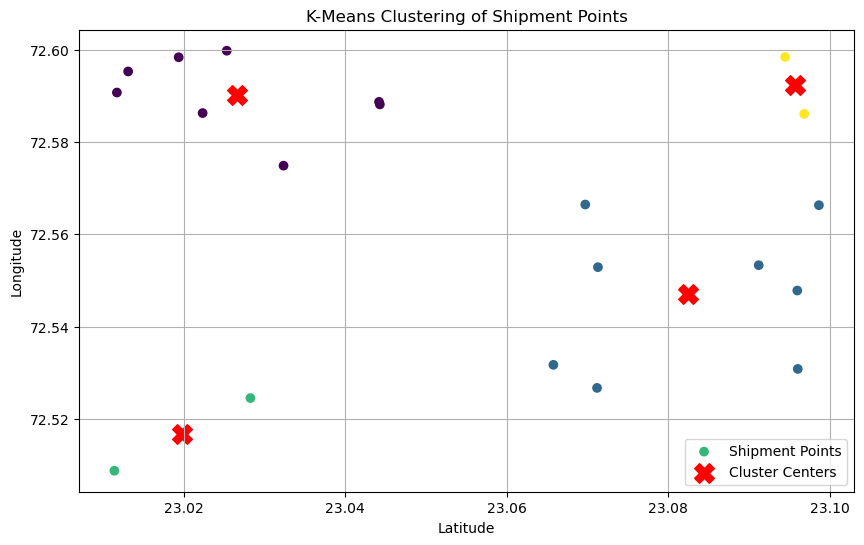

In [529]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 20  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range
num_clusters = 4  # Number of clusters

# Generate random shipment points
shipment_points = generate_random_points(num_points, lat_range, lon_range)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(shipment_points)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(shipment_points[:, 0], shipment_points[:, 1], c=labels, cmap='viridis', marker='o', label='Shipment Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering of Shipment Points')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid()
plt.show()

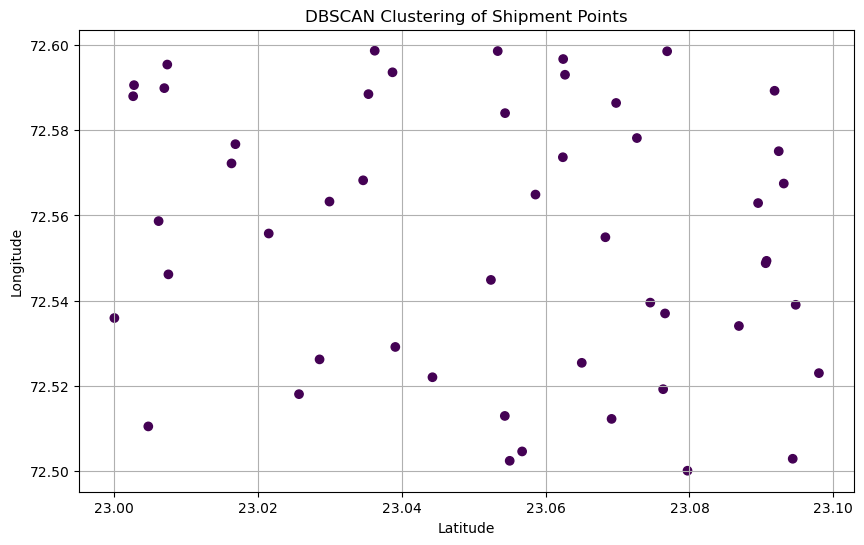

In [531]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 50  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_points = generate_random_points(num_points, lat_range, lon_range)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.005, min_samples=5)
labels = dbscan.fit_predict(shipment_points)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(shipment_points[:, 0], shipment_points[:, 1], c=labels, cmap='viridis', marker='o', label='Shipment Points')
plt.title('DBSCAN Clustering of Shipment Points')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid()
plt.show()

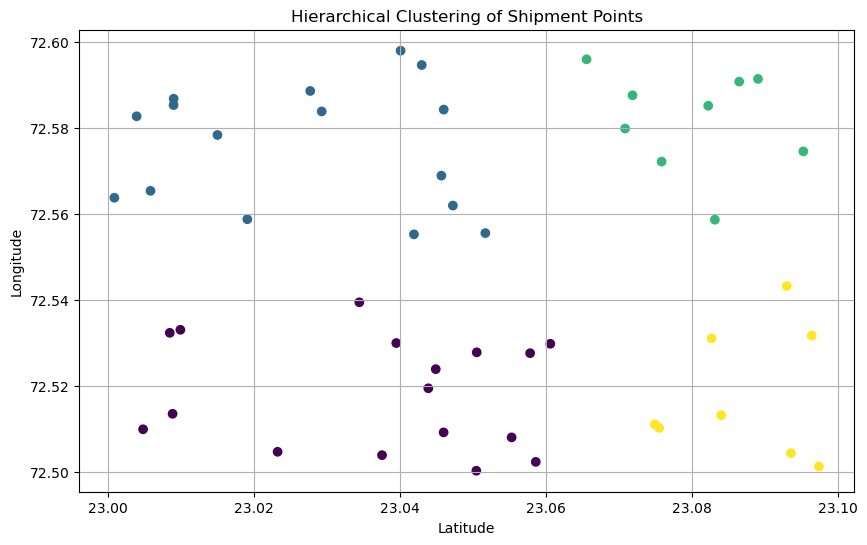

In [533]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 50  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_points = generate_random_points(num_points, lat_range, lon_range)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
labels = hierarchical.fit_predict(shipment_points)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(shipment_points[:, 0], shipment_points[:, 1], c=labels, cmap='viridis', marker='o', label='Shipment Points')
plt.title('Hierarchical Clustering of Shipment Points')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid()
plt.show()

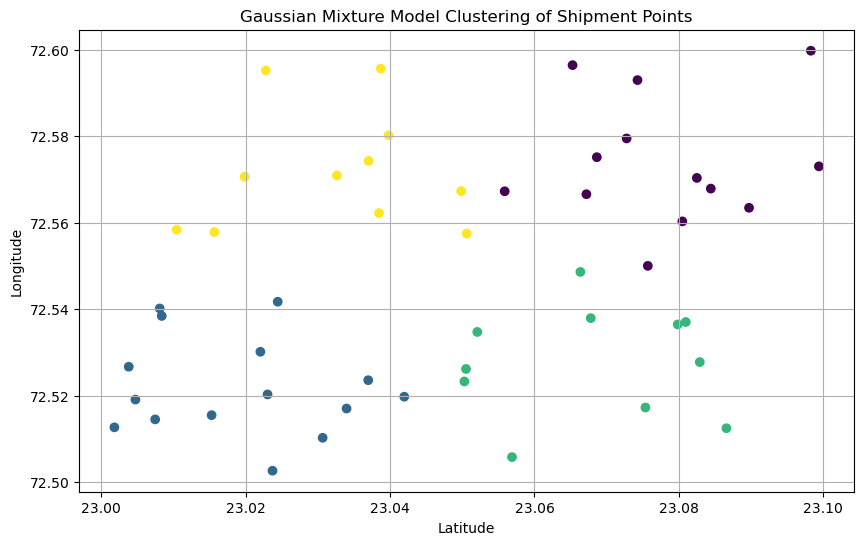

In [535]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 50  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_points = generate_random_points(num_points, lat_range, lon_range)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4)
gmm.fit(shipment_points)
labels = gmm.predict(shipment_points)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(shipment_points[:, 0], shipment_points[:, 1], c=labels, cmap='viridis', marker='o', label='Shipment Points')
plt.title('Gaussian Mixture Model Clustering of Shipment Points')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid()
plt.show()

Inertia: 0.018443700748948338
Silhouette Score: 0.44747528261822717
Davies-Bouldin Score: 0.7596102550415146
Calinski-Harabasz Score: 48.8100315611957


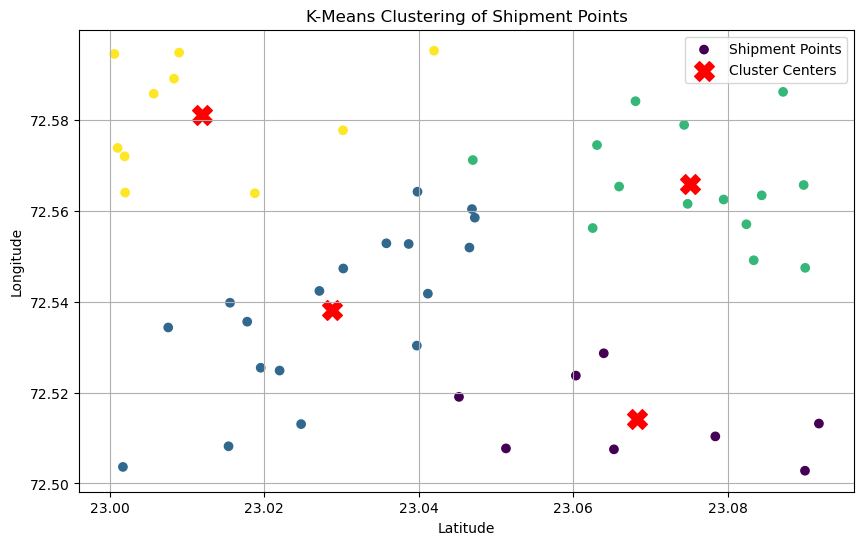

In [538]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 50  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range
num_clusters = 4  # Number of clusters

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(shipment_data)

# ✅ Inertia (lower is better)
print(f"Inertia: {kmeans.inertia_}")

# ✅ Silhouette Score (closer to 1 is better)
sil_score = silhouette_score(shipment_data, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# ✅ Davies-Bouldin Index (lower is better)
db_score = davies_bouldin_score(shipment_data, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score}")

# ✅ Calinski-Harabasz Index (higher is better)
ch_score = calinski_harabasz_score(shipment_data, kmeans.labels_)
print(f"Calinski-Harabasz Score: {ch_score}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(shipment_data[:, 0], shipment_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', label='Shipment Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering of Shipment Points')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid()
plt.show()

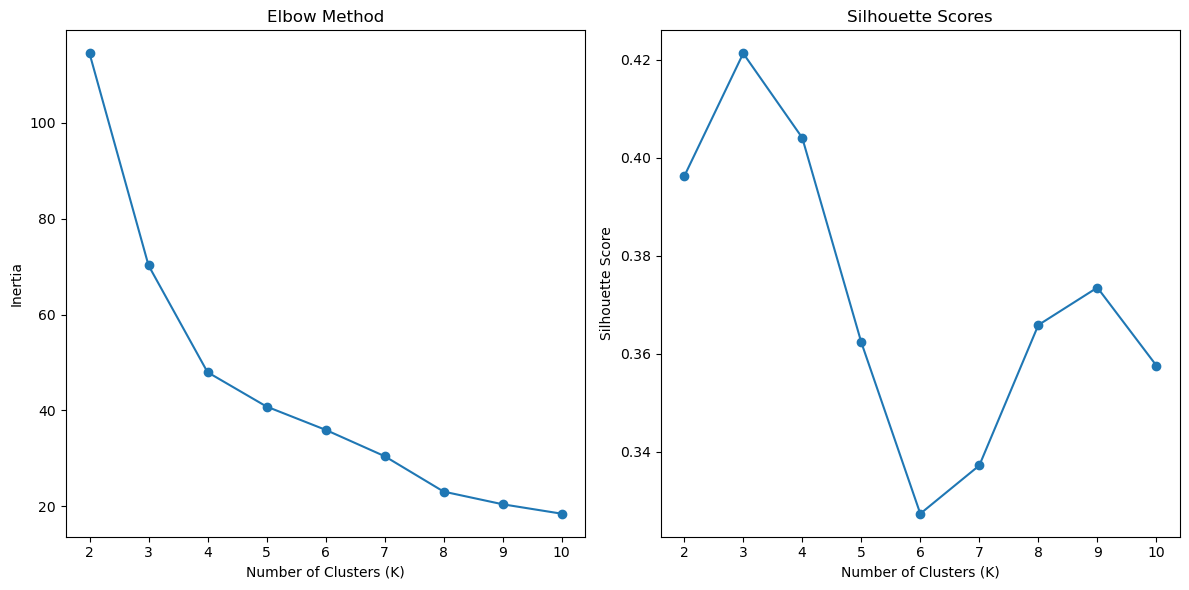

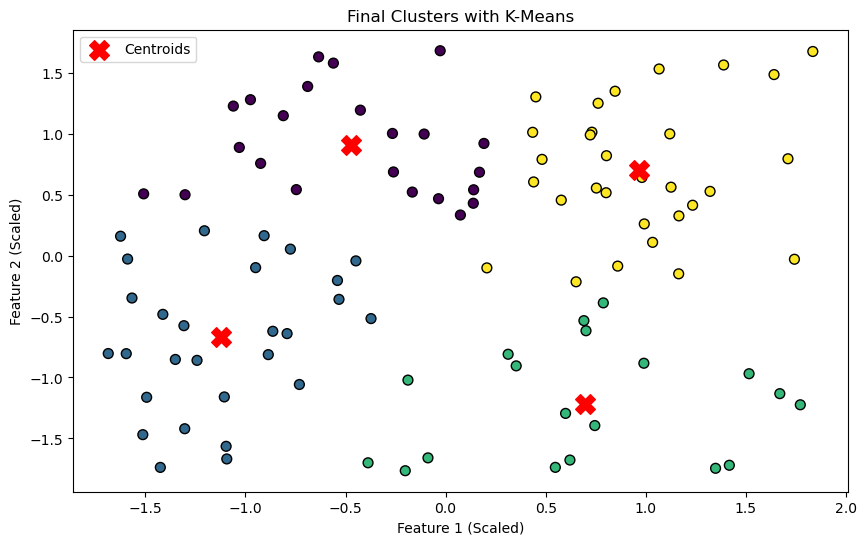

In [540]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 100  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_k = 4  # Example optimal K based on the plots

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(scaled_data)

# Plot the final clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Final Clusters with K-Means')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()

Inertia: 0.025065531027795945
Silhouette Score: 0.30666091140974067
Davies-Bouldin Score: 0.9603557840511553
Calinski-Harabasz Score: 34.131383020502746


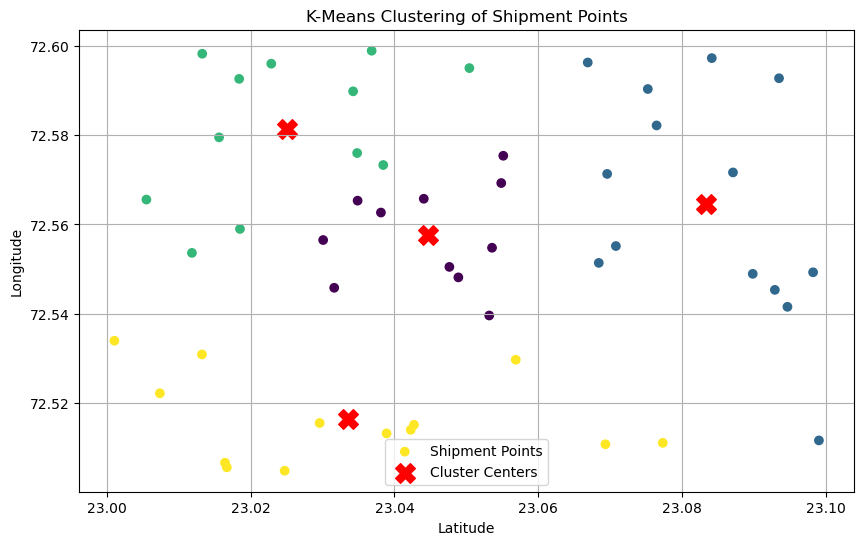

In [542]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 50  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range
num_clusters = 4  # Number of clusters

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(shipment_data)

# ✅ Inertia (lower is better)
print(f"Inertia: {kmeans.inertia_}")

# ✅ Silhouette Score (closer to 1 is better)
sil_score = silhouette_score(shipment_data, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# ✅ Davies-Bouldin Index (lower is better)
db_score = davies_bouldin_score(shipment_data, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score}")

# ✅ Calinski-Harabasz Index (higher is better)
ch_score = calinski_harabasz_score(shipment_data, kmeans.labels_)
print(f"Calinski-Harabasz Score: {ch_score}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(shipment_data[:, 0], shipment_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', label='Shipment Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering of Shipment Points')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid()
plt.show()

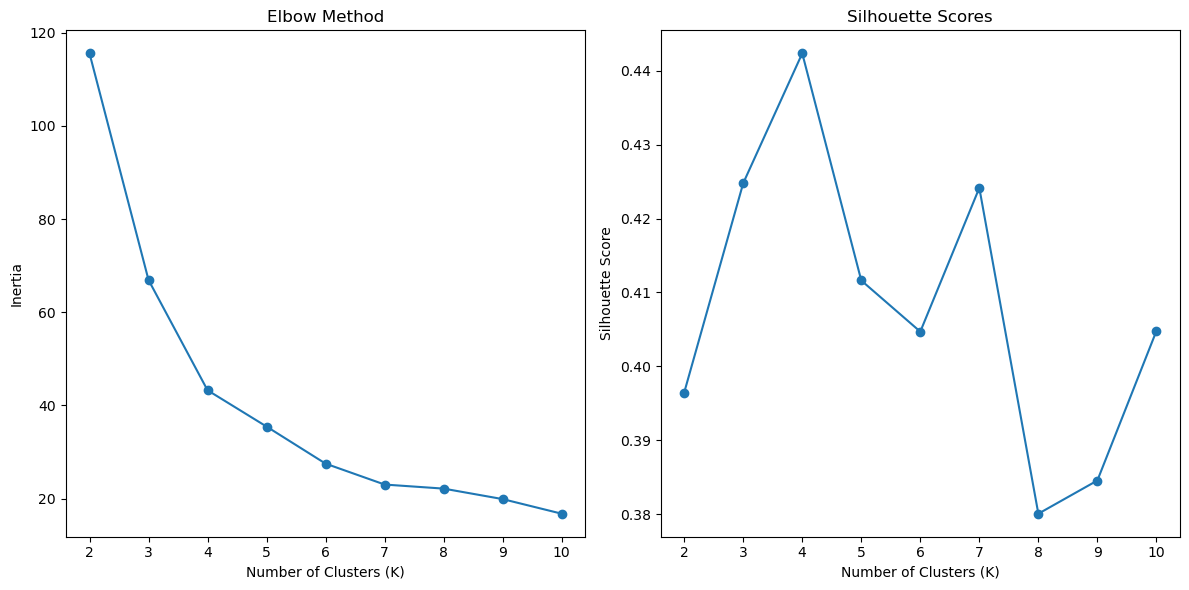

Inertia: 43.25505208510117
Silhouette Score: 0.44232851830406056
Davies-Bouldin Score: 0.7188404349669677
Calinski-Harabasz Score: 115.95959527244284


In [518]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 100  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_k = 4  # Example optimal K based on the plots

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(scaled_data)

# Calculate clustering evaluation metrics
print(f"Inertia: {kmeans.inertia_}")
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")
db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score}")
ch_score = calinski_harabasz_score(scaled_data, kmeans.labels_)
print(f"Calinski-Harabasz Score: {ch_score}")

# Plot the final clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with K-Means')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()

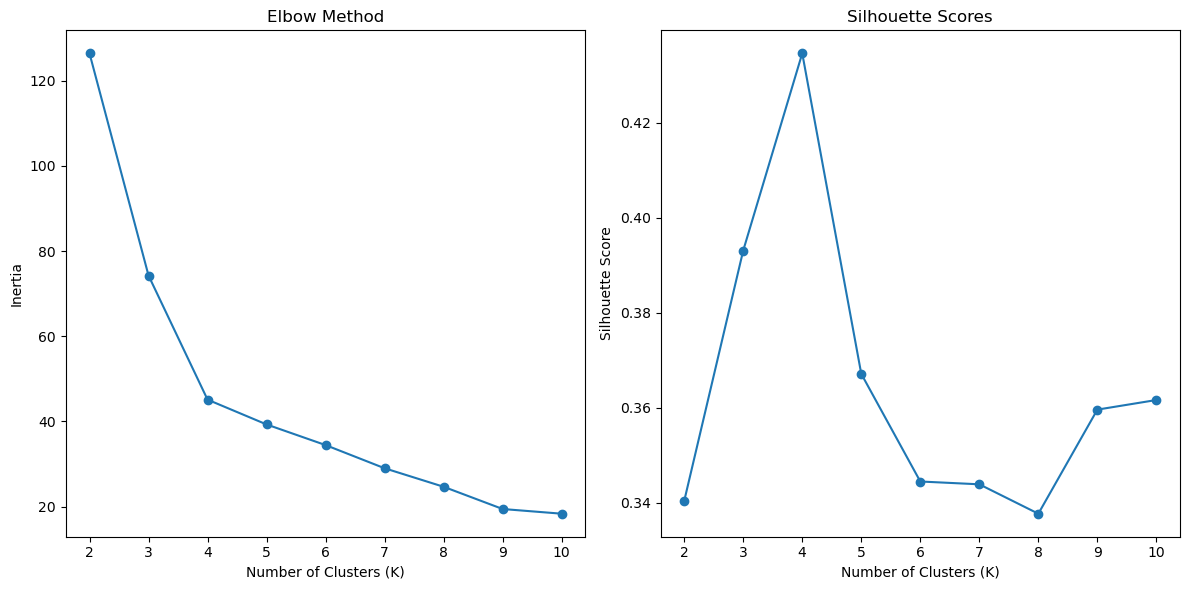

Inertia: 45.107166096843315
Silhouette Score: 0.43456949746298357
Davies-Bouldin Score: 0.7087467907633438
Calinski-Harabasz Score: 109.88432911656324


GMM Silhouette Score: 0.4235996517182745
GMM Davies-Bouldin Score: 0.7135621854074995
GMM Calinski-Harabasz Score: 103.67972820055792


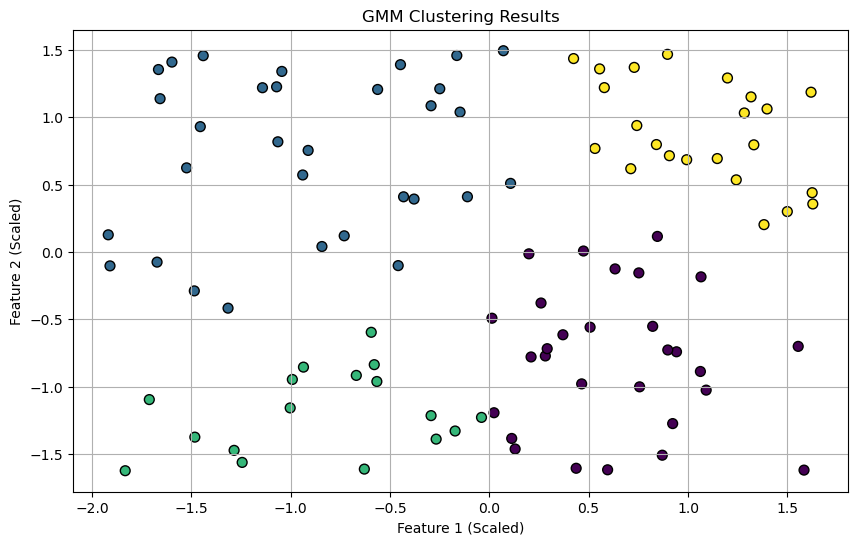

In [544]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 100  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_k = 4  # Example optimal K based on the plots

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(scaled_data)

# Calculate clustering evaluation metrics
print(f"Inertia: {kmeans.inertia_}")
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")
db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score}")
ch_score = calinski_harabasz_score(scaled_data, kmeans.labels_)
print(f"Calinski-Harabasz Score: {ch_score}")

# Plot the final clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with K-Means')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()

# Optional: Try DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Calculate DBSCAN evaluation metrics
if len(set(dbscan_labels)) > 1:  # Check if there are at least 2 clusters
    db_sil_score = silhouette_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {db_sil_score}")
    db_db_score = davies_bouldin_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Davies-Bouldin Score: {db_db_score}")
    db_ch_score = calinski_harabasz_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Calinski-Harabasz Score: {db_ch_score}")

    # Plot DBSCAN results
    plt.figure(figsize=(10, 6))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title('DBSCAN Clustering Results')
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.grid()
    plt.show()

# Optional: Try Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=0)
gmm.fit(scaled_data)
gmm_labels = gmm.predict(scaled_data)

# Calculate GMM evaluation metrics
gmm_sil_score = silhouette_score(scaled_data, gmm_labels)
print(f"GMM Silhouette Score: {gmm_sil_score}")
gmm_db_score = davies_bouldin_score(scaled_data, gmm_labels)
print(f"GMM Davies-Bouldin Score: {gmm_db_score}")
gmm_ch_score = calinski_harabasz_score(scaled_data, gmm_labels)
print(f"GMM Calinski-Harabasz Score: {gmm_ch_score}")

# Plot GMM results
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('GMM Clustering Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.grid()
plt.show()

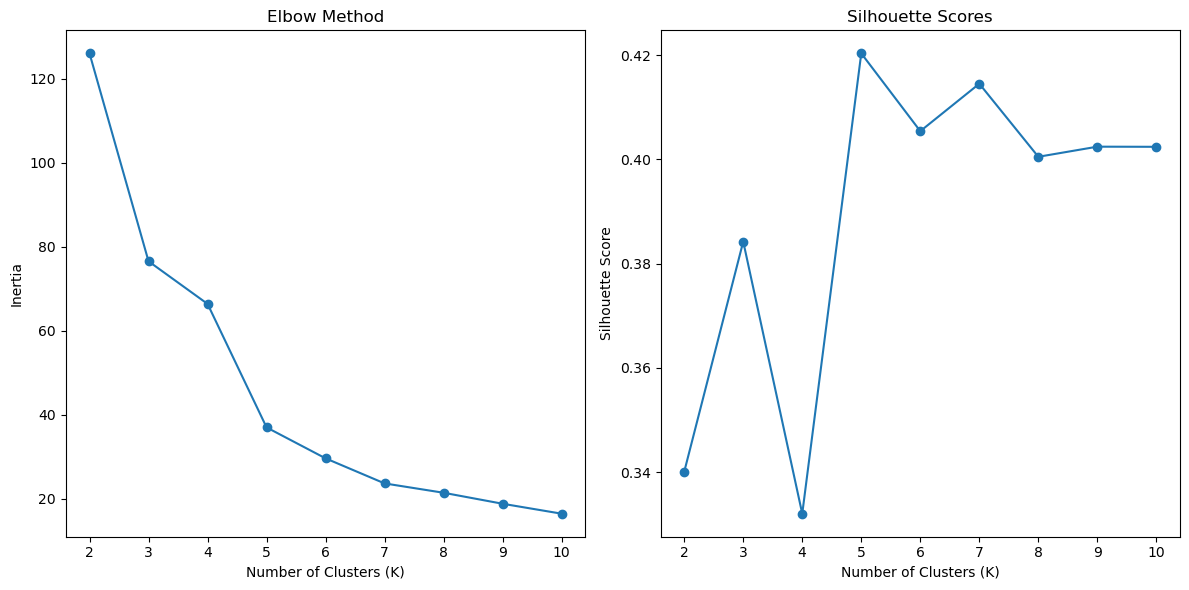

K-Means Inertia: 66.3714028174614
K-Means Silhouette Score: 0.3320069648930684
K-Means Davies-Bouldin Score: 0.9705861996913725
K-Means Calinski-Harabasz Score: 64.42707142414423


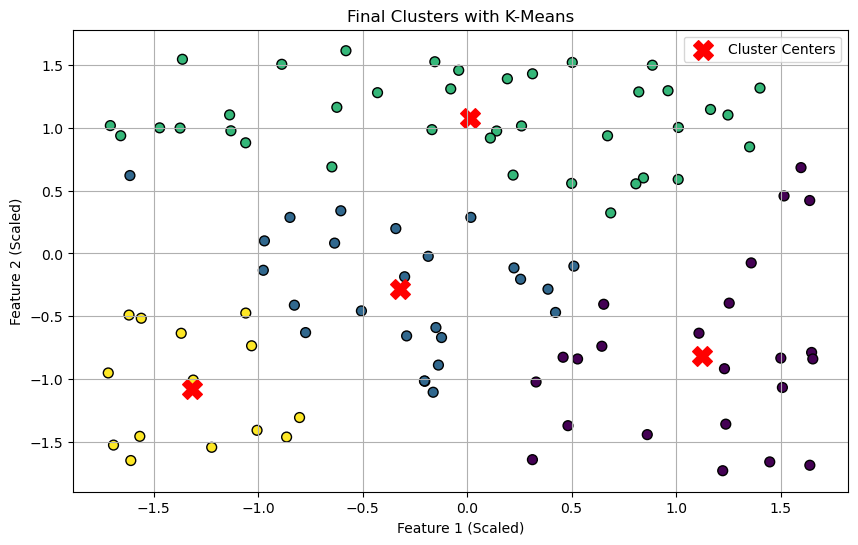

GMM Silhouette Score: 0.3314604341039979
GMM Davies-Bouldin Score: 0.9340920919311876
GMM Calinski-Harabasz Score: 59.49258703631488


In [550]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 100  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_k = 4  # Example optimal K based on the plots

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(scaled_data)

# Calculate clustering evaluation metrics
print(f"K-Means Inertia: {kmeans.inertia_}")
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f"K-Means Silhouette Score: {sil_score}")
db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f"K-Means Davies-Bouldin Score: {db_score}")
ch_score = calinski_harabasz_score(scaled_data, kmeans.labels_)
print(f"K-Means Calinski-Harabasz Score: {ch_score}")

# Plot the final clusters for K-Means
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with K-Means')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()

# Optional: Try DBSCAN with parameter tuning
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Calculate DBSCAN evaluation metrics
if len(set(dbscan_labels)) > 1:  # Check if there are at least 2 clusters
    db_sil_score = silhouette_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {db_sil_score}")
    db_db_score = davies_bouldin_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Davies-Bouldin Score: {db_db_score}")
    db_ch_score = calinski_harabasz_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Calinski-Harabasz Score: {db_ch_score}")

    # Plot DBSCAN results
    plt.figure(figsize=(10, 6))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title('DBSCAN Clustering Results')
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.grid()
    plt.show()

# Optional: Try Gaussian Mixture Model with parameter tuning
gmm = GaussianMixture(n_components=optimal_k, random_state=0)
gmm.fit(scaled_data)
gmm_labels = gmm.predict(scaled_data)

# Calculate GMM evaluation metrics
gmm_sil_score = silhouette_score(scaled_data, gmm_labels)
print(f"GMM Silhouette Score: {gmm_sil_score}")
gmm_db_score = davies_bouldin_score(scaled_data, gmm_labels)
print(f"GMM Davies-Bouldin Score: {gmm_db_score}")
gmm_ch_score = calinski_harabasz_score(scaled_data, gmm_labels)
print(f"GMM Calinski-Harabasz Score: {gmm_ch_score}")

# Plot GMM results
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('GMM Clustering Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.grid()
plt.show()

K-Means Inertia: 53.500294353973146
K-Means Silhouette Score: 0.3792059662381566
K-Means Davies-Bouldin Score: 0.8636679759920464
K-Means Calinski-Harabasz Score: 87.62551005151082


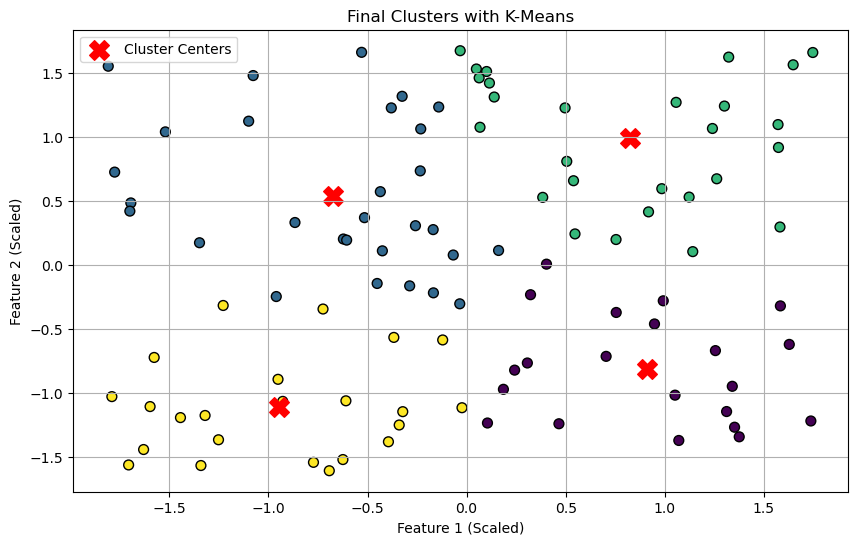

GMM Silhouette Score: 0.3410832888694651
GMM Davies-Bouldin Score: 0.9704992537655937
GMM Calinski-Harabasz Score: 65.61475988634784


In [554]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 100  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_k = 4  # Example optimal K based on the plots

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(scaled_data)

# Calculate clustering evaluation metrics
print(f"K-Means Inertia: {kmeans.inertia_}")
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f"K-Means Silhouette Score: {sil_score}")
db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f"K-Means Davies-Bouldin Score: {db_score}")
ch_score = calinski_harabasz_score(scaled_data, kmeans.labels_)
print(f"K-Means Calinski-Harabasz Score: {ch_score}")

# Plot the final clusters for K-Means
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with K-Means')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()

# Optional: Try DBSCAN with parameter tuning
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Calculate DBSCAN evaluation metrics
if len(set(dbscan_labels)) > 1:  # Check if there are at least 2 clusters
    db_sil_score = silhouette_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {db_sil_score}")
    db_db_score = davies_bouldin_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Davies-Bouldin Score: {db_db_score}")
    db_ch_score = calinski_harabasz_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Calinski-Harabasz Score: {db_ch_score}")

    # Plot DBSCAN results
    plt.figure(figsize=(10, 6))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title('DBSCAN Clustering Results')
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.grid()
    plt.show()

# Optional: Try Gaussian Mixture Model with parameter tuning
gmm = GaussianMixture(n_components=optimal_k, random_state=0)
gmm.fit(scaled_data)
gmm_labels = gmm.predict(scaled_data)

# Calculate GMM evaluation metrics
gmm_sil_score = silhouette_score(scaled_data, gmm_labels)
print(f"GMM Silhouette Score: {gmm_sil_score}")
gmm_db_score = davies_bouldin_score(scaled_data, gmm_labels)
print(f"GMM Davies-Bouldin Score: {gmm_db_score}")
gmm_ch_score = calinski_harabasz_score(scaled_data, gmm_labels)
print(f"GMM Calinski-Harabasz Score: {gmm_ch_score}")

# Plot GMM results
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('GMM Clustering Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.grid()
plt.show()

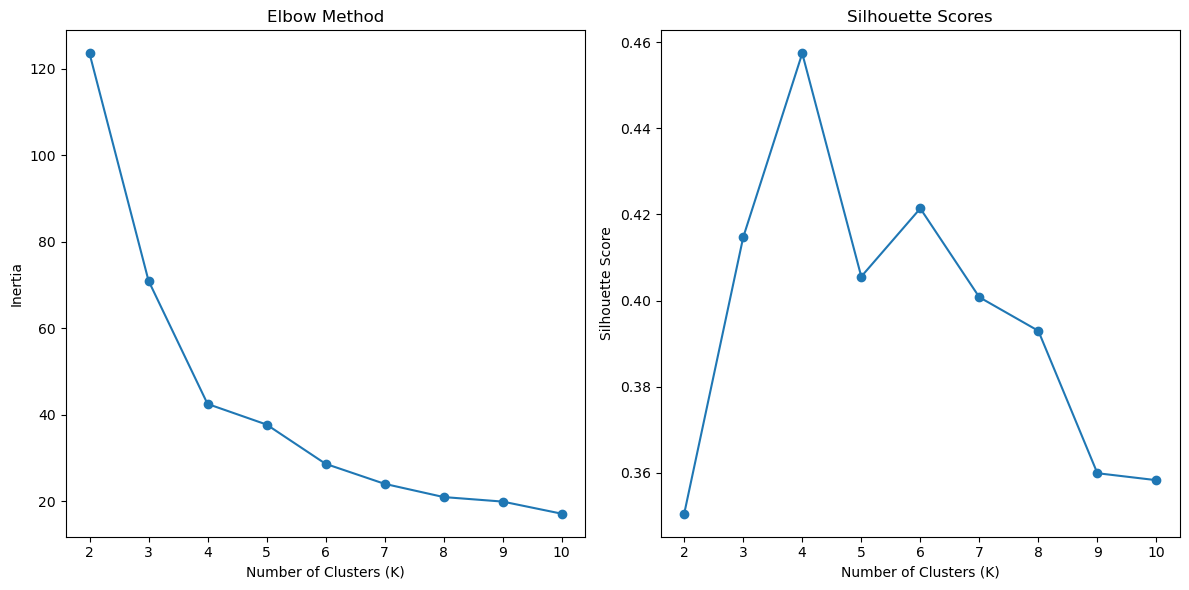

K-Means Inertia: 42.50520931089024
K-Means Silhouette Score: 0.4574582685522902
K-Means Davies-Bouldin Score: 0.7140621136209853
K-Means Calinski-Harabasz Score: 118.5697796519323


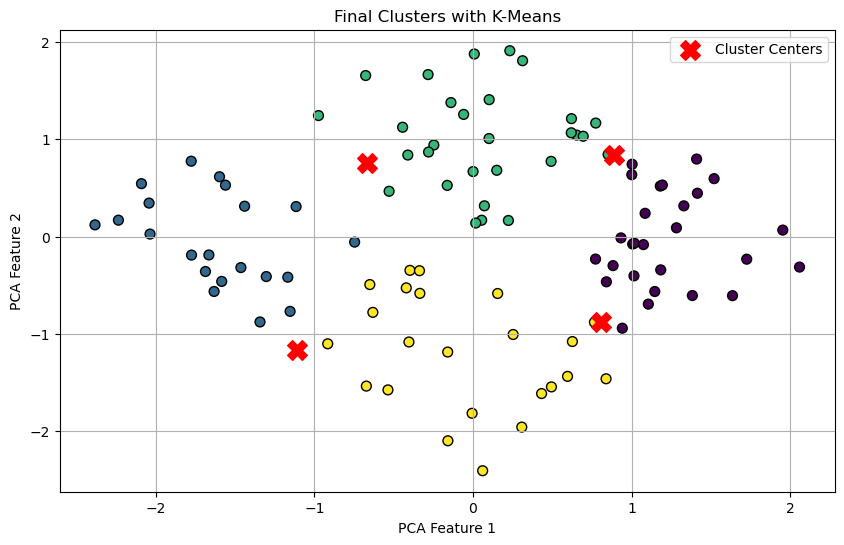

In [566]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 100  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Outlier removal using Z-score
z_scores = np.abs(stats.zscore(scaled_data))
filtered_data = scaled_data[(z_scores < 3).all(axis=1)]  # Keep points with Z-score < 3

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(filtered_data)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(filtered_data, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_k = 4  # Example optimal K based on the plots

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0)
kmeans.fit(filtered_data)

# Calculate clustering evaluation metrics
print(f"K-Means Inertia: {kmeans.inertia_}")
sil_score = silhouette_score(filtered_data, kmeans.labels_)
print(f"K-Means Silhouette Score: {sil_score}")
db_score = davies_bouldin_score(filtered_data, kmeans.labels_)
print(f"K-Means Davies-Bouldin Score: {db_score}")
ch_score = calinski_harabasz_score(filtered_data, kmeans.labels_)
print(f"K-Means Calinski-Harabasz Score: {ch_score}")

# Optional: Dimensionality Reduction with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)

# Plot the final clusters for K-Means
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with K-Means')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.grid()
plt.show()

K-Means Inertia: 98.57645218904938
K-Means Silhouette Score: 0.4079656602310666
K-Means Davies-Bouldin Score: 0.7857679124902579
K-Means Calinski-Harabasz Score: 199.77392862426854


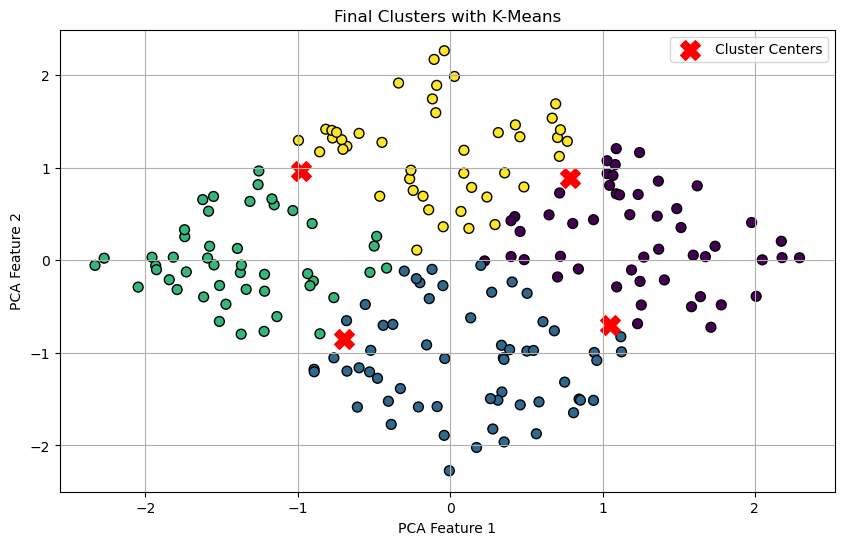

In [573]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 200  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Outlier removal using Z-score
z_scores = np.abs(stats.zscore(scaled_data))
filtered_data = scaled_data[(z_scores < 3).all(axis=1)]  # Keep points with Z-score < 3

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(filtered_data)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(filtered_data, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_k = 4  # Example optimal K based on the plots

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0)
kmeans.fit(filtered_data)

# Calculate clustering evaluation metrics
print(f"K-Means Inertia: {kmeans.inertia_}")
sil_score = silhouette_score(filtered_data, kmeans.labels_)
print(f"K-Means Silhouette Score: {sil_score}")
db_score = davies_bouldin_score(filtered_data, kmeans.labels_)
print(f"K-Means Davies-Bouldin Score: {db_score}")
ch_score = calinski_harabasz_score(filtered_data, kmeans.labels_)
print(f"K-Means Calinski-Harabasz Score: {ch_score}")

# Optional: Dimensionality Reduction with PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)

# Plot the final clusters for K-Means
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with K-Means')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.grid()
plt.show()

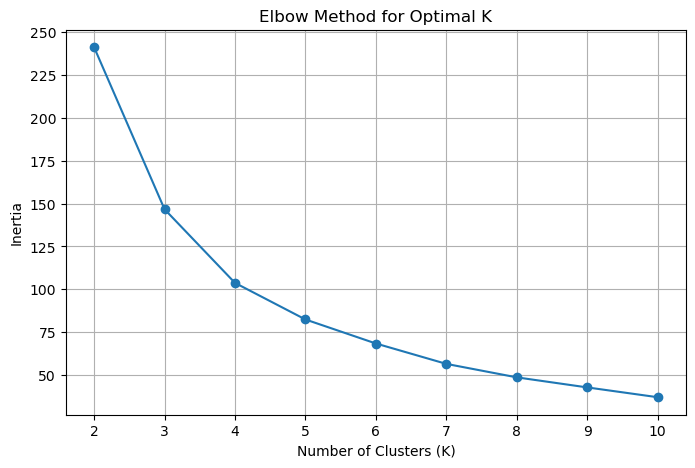

K-Means Inertia: 103.73504506568662
K-Means Silhouette Score: 0.3861779862272734
K-Means Davies-Bouldin Score: 0.8220909564719883
K-Means Calinski-Harabasz Score: 186.59053016704206


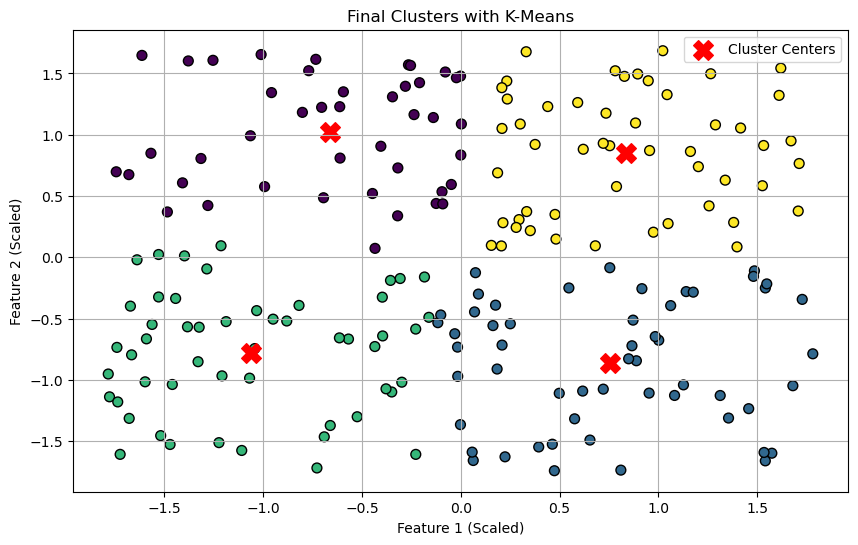

In [577]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 200  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Outlier removal using Z-score
z_scores = np.abs(stats.zscore(scaled_data))
filtered_data = scaled_data[(z_scores < 3).all(axis=1)]  # Keep points with Z-score < 3

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(filtered_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose the optimal number of clusters based on the Elbow Method
optimal_k = 4  # Example optimal K based on the plot

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
kmeans.fit(filtered_data)

# Calculate clustering evaluation metrics
print(f"K-Means Inertia: {kmeans.inertia_}")
sil_score = silhouette_score(filtered_data, kmeans.labels_)
print(f"K-Means Silhouette Score: {sil_score}")
db_score = davies_bouldin_score(filtered_data, kmeans.labels_)
print(f"K-Means Davies-Bouldin Score: {db_score}")
ch_score = calinski_harabasz_score(filtered_data, kmeans.labels_)
print(f"K-Means Calinski-Harabasz Score: {ch_score}")

# Plot the final clusters for K-Means
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with K-Means')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()

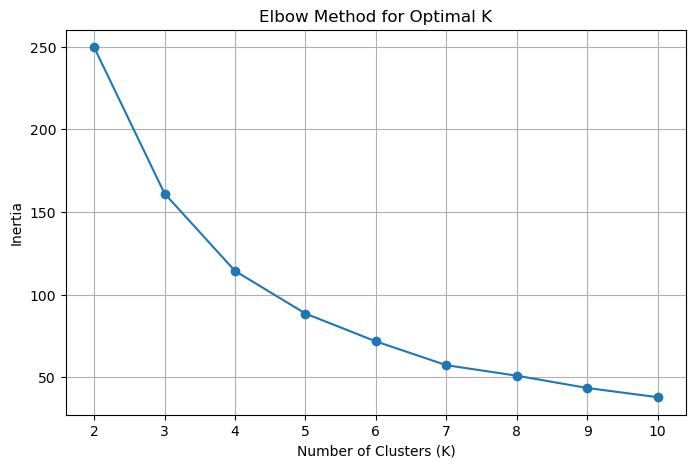

K-Means Inertia: 114.29499965869232
K-Means Silhouette Score: 0.36952907968763316
K-Means Davies-Bouldin Score: 0.8546369687697862
K-Means Calinski-Harabasz Score: 163.3147563588901


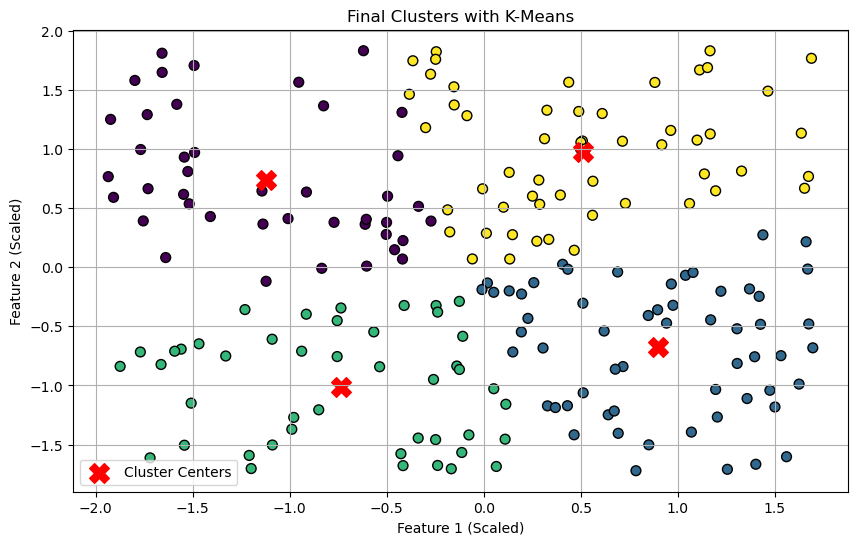

In [613]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = []
    for _ in range(num_points):
        lat = np.random.uniform(lat_range[0], lat_range[1])
        lon = np.random.uniform(lon_range[0], lon_range[1])
        points.append((lat, lon))
    return np.array(points)

# Parameters
num_points = 200  # Number of random points
lat_range = (23.0, 23.1)  # Latitude range
lon_range = (72.5, 72.6)  # Longitude range

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Outlier removal using Z-score
z_scores = np.abs(stats.zscore(scaled_data))
filtered_data = scaled_data[(z_scores < 3).all(axis=1)]  # Keep points with Z-score < 3

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(filtered_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose the optimal number of clusters based on the Elbow Method
optimal_k = 4  # Example optimal K based on the plot

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
kmeans.fit(filtered_data)

# Calculate clustering evaluation metrics
print(f"K-Means Inertia: {kmeans.inertia_}")
sil_score = silhouette_score(filtered_data, kmeans.labels_)
print(f"K-Means Silhouette Score: {sil_score}")
db_score = davies_bouldin_score(filtered_data, kmeans.labels_)
print(f"K-Means Davies-Bouldin Score: {db_score}")
ch_score = calinski_harabasz_score(filtered_data, kmeans.labels_)
print(f"K-Means Calinski-Harabasz Score: {ch_score}")

# Plot the final clusters for K-Means
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with K-Means')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()

In [617]:
pip install hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


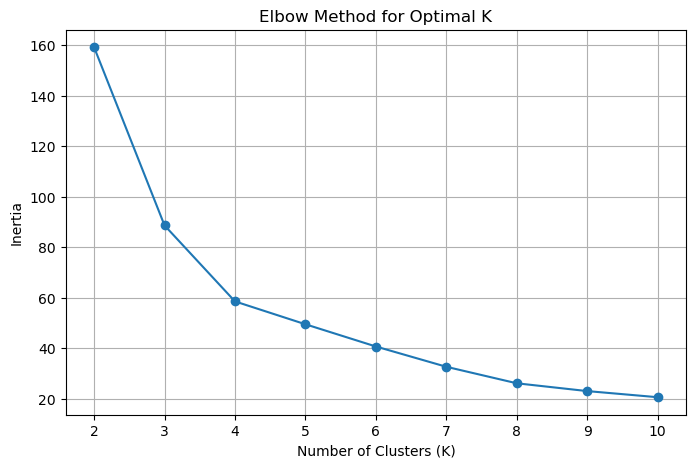

🚀 MiniBatch K-Means Performance:
✅ Inertia: 48.45930278342573
✅ Silhouette Score: 0.4019 (Higher is better)
✅ Davies-Bouldin Score: 0.8818 (Lower is better)
✅ Calinski-Harabasz Score: 136.8105 (Higher is better)


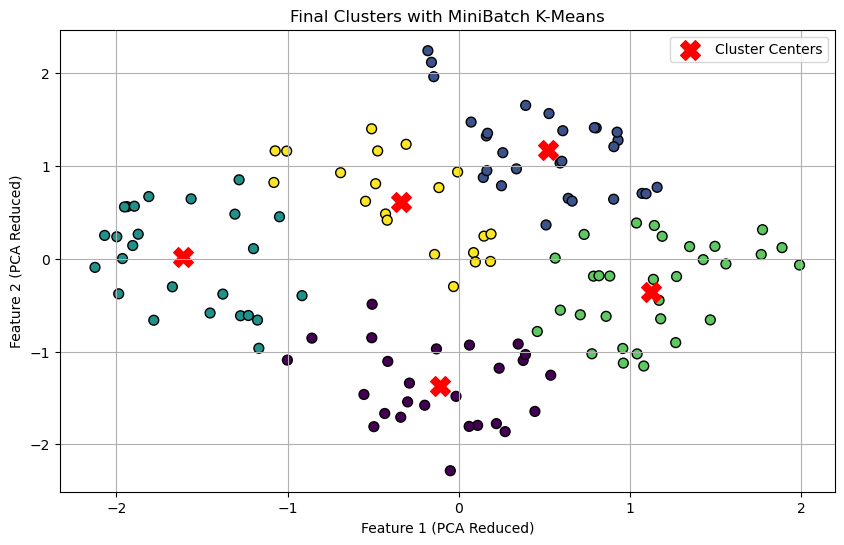

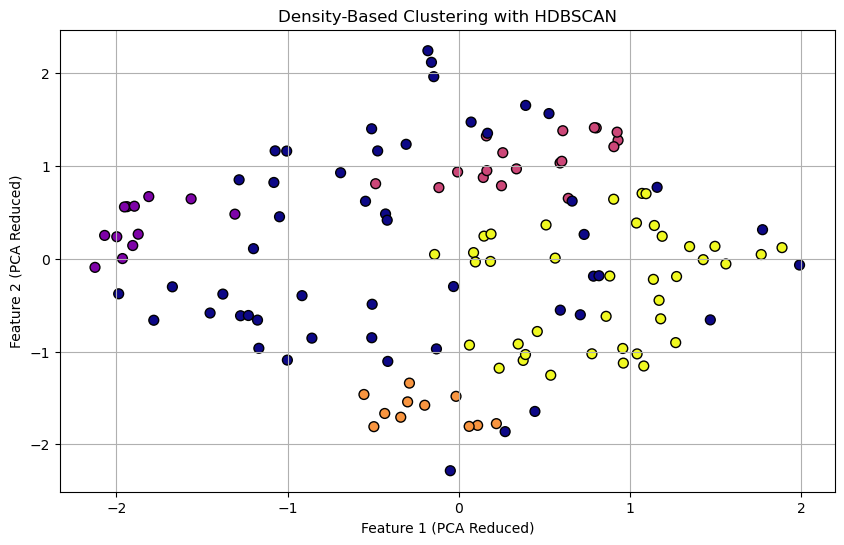

🚀 Clustering Performance Optimization Completed!


In [639]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import hdbscan
from joblib import Parallel, delayed

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = np.column_stack((np.random.uniform(lat_range[0], lat_range[1], num_points),
                              np.random.uniform(lon_range[0], lon_range[1], num_points)))
    return points

# Parameters
num_points = 130  # Increased dataset size for real-world testing
lat_range = (23.0, 23.2)  # Slightly expanded region
lon_range = (72.5, 72.7)

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Outlier removal using Z-score
z_scores = np.abs(stats.zscore(scaled_data))
filtered_data = scaled_data[(z_scores < 3).all(axis=1)]  # Keep points with Z-score < 3

# Apply PCA to speed up clustering (reduces noise)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_data)

# Determine the optimal number of clusters using the Elbow Method
def compute_kmeans_inertia(k, data):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(data)
    return kmeans.inertia_

K = range(2, 11)

# Use Parallel Processing to speed up inertia calculations
inertia = Parallel(n_jobs=-1)(delayed(compute_kmeans_inertia)(k, reduced_data) for k in K)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose the optimal number of clusters based on the Elbow Method
optimal_k = 5  # Choose based on elbow plot

# Apply MiniBatch K-Means for faster clustering
mini_kmeans = MiniBatchKMeans(n_clusters=optimal_k, batch_size=500, random_state=0, n_init=10)
mini_kmeans.fit(reduced_data)

# Calculate clustering evaluation metrics
sil_score = silhouette_score(reduced_data, mini_kmeans.labels_)
db_score = davies_bouldin_score(reduced_data, mini_kmeans.labels_)
ch_score = calinski_harabasz_score(reduced_data, mini_kmeans.labels_)

print(f"🚀 MiniBatch K-Means Performance:")
print(f"✅ Inertia: {mini_kmeans.inertia_}")
print(f"✅ Silhouette Score: {sil_score:.4f} (Higher is better)")
print(f"✅ Davies-Bouldin Score: {db_score:.4f} (Lower is better)")
print(f"✅ Calinski-Harabasz Score: {ch_score:.4f} (Higher is better)")

# Plot the final clusters for MiniBatch K-Means
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=mini_kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(mini_kmeans.cluster_centers_[:, 0], mini_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with MiniBatch K-Means')
plt.xlabel('Feature 1 (PCA Reduced)')
plt.ylabel('Feature 2 (PCA Reduced)')
plt.legend()
plt.grid()
plt.show()

# Alternative: Use HDBSCAN for Density-Based Clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(reduced_data)

# Plot HDBSCAN Clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hdbscan_labels, cmap='plasma', marker='o', edgecolor='k', s=50)
plt.title('Density-Based Clustering with HDBSCAN')
plt.xlabel('Feature 1 (PCA Reduced)')
plt.ylabel('Feature 2 (PCA Reduced)')
plt.grid()
plt.show()

print("🚀 Clustering Performance Optimization Completed!")


In [643]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


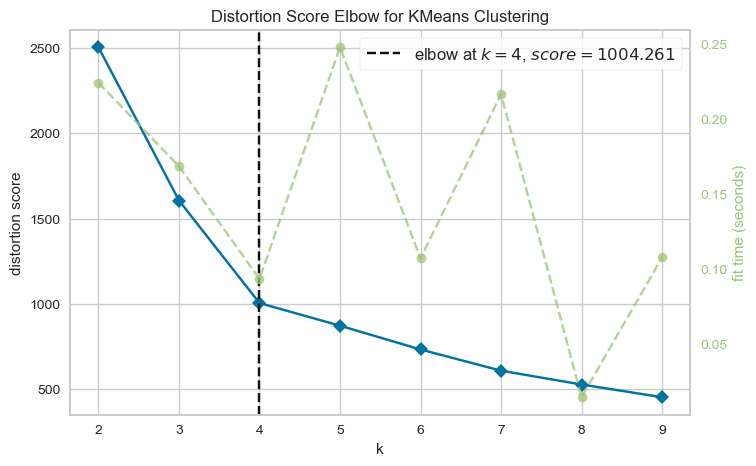

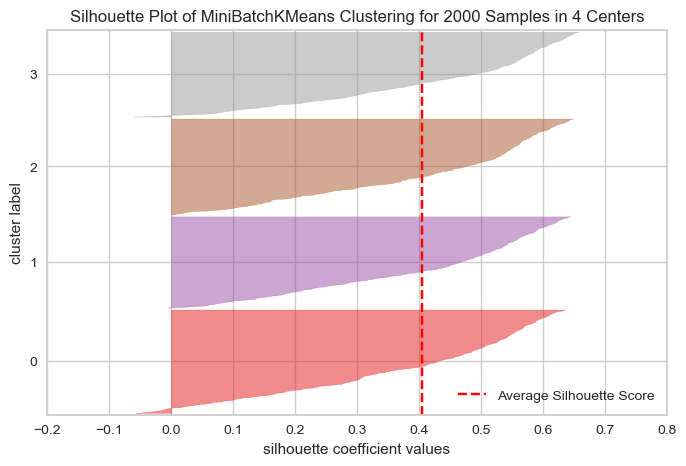

🚀 MiniBatch K-Means Performance:
✅ Inertia: 1010.5560884608694
✅ Silhouette Score: 0.4052 (Higher is better)
✅ Davies-Bouldin Score: 0.7695 (Lower is better)
✅ Calinski-Harabasz Score: 1977.1195 (Higher is better)


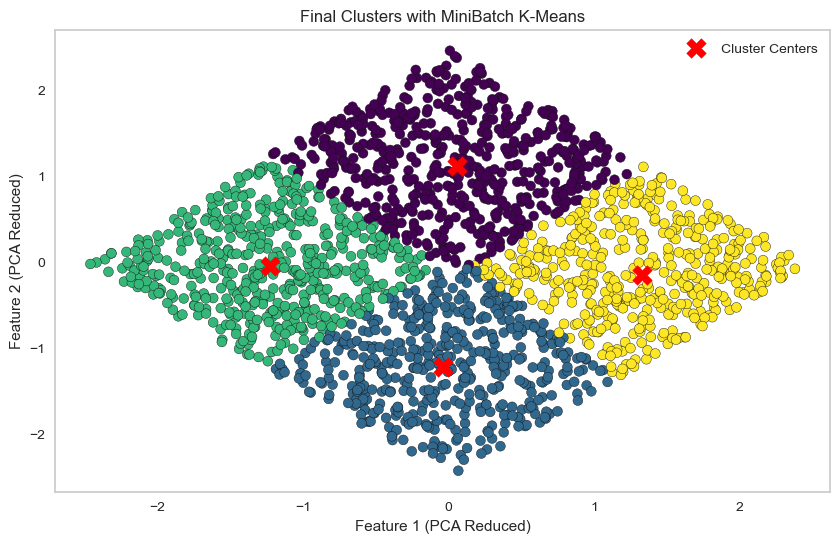

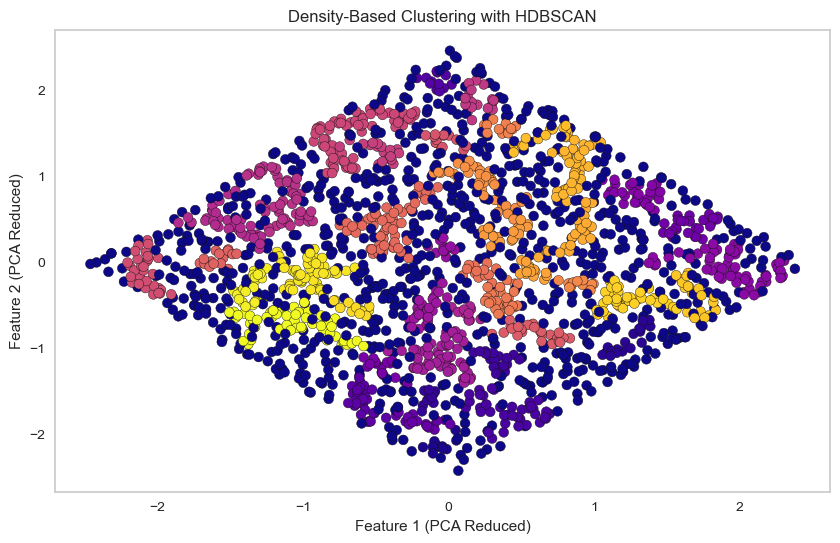

🚀 Clustering Performance Optimization Completed!


In [645]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import hdbscan
from joblib import Parallel, delayed
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = np.column_stack((np.random.uniform(lat_range[0], lat_range[1], num_points),
                              np.random.uniform(lon_range[0], lon_range[1], num_points)))
    return points

# Parameters
num_points = 2000  # Increased dataset size for real-world testing
lat_range = (23.0, 23.2)  # Slightly expanded region
lon_range = (72.5, 72.7)

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Outlier removal using Z-score
z_scores = np.abs(stats.zscore(scaled_data))
filtered_data = scaled_data[(z_scores < 2.5).all(axis=1)]  # Keep points with Z-score < 2.5 (Stricter threshold)

# Apply PCA for dimensionality reduction (Faster Clustering)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_data)

# Find the optimal number of clusters using the Elbow Method
fig, ax = plt.subplots(figsize=(8, 5))
elbow_visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=0), k=(2, 10), ax=ax, metric='distortion')
elbow_visualizer.fit(reduced_data)
elbow_visualizer.show()

# Choose the optimal number of clusters from Elbow method
optimal_k = elbow_visualizer.elbow_value_

# Apply MiniBatch K-Means (Efficient Clustering for Large Data)
mini_kmeans = MiniBatchKMeans(n_clusters=optimal_k, batch_size=500, random_state=0, n_init=10)
mini_kmeans.fit(reduced_data)

# Silhouette Analysis for Cluster Quality
fig, ax = plt.subplots(figsize=(8, 5))
silhouette_visualizer = SilhouetteVisualizer(mini_kmeans, ax=ax)
silhouette_visualizer.fit(reduced_data)
silhouette_visualizer.show()

# Evaluate Clustering Metrics
sil_score = silhouette_score(reduced_data, mini_kmeans.labels_)
db_score = davies_bouldin_score(reduced_data, mini_kmeans.labels_)
ch_score = calinski_harabasz_score(reduced_data, mini_kmeans.labels_)

print(f"🚀 MiniBatch K-Means Performance:")
print(f"✅ Inertia: {mini_kmeans.inertia_}")
print(f"✅ Silhouette Score: {sil_score:.4f} (Higher is better)")
print(f"✅ Davies-Bouldin Score: {db_score:.4f} (Lower is better)")
print(f"✅ Calinski-Harabasz Score: {ch_score:.4f} (Higher is better)")

# Plot the final clusters for MiniBatch K-Means
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=mini_kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(mini_kmeans.cluster_centers_[:, 0], mini_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with MiniBatch K-Means')
plt.xlabel('Feature 1 (PCA Reduced)')
plt.ylabel('Feature 2 (PCA Reduced)')
plt.legend()
plt.grid()
plt.show()

# Alternative: Use HDBSCAN for Density-Based Clustering (Auto-Detects Clusters)
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(reduced_data)

# Plot HDBSCAN Clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hdbscan_labels, cmap='plasma', marker='o', edgecolor='k', s=50)
plt.title('Density-Based Clustering with HDBSCAN')
plt.xlabel('Feature 1 (PCA Reduced)')
plt.ylabel('Feature 2 (PCA Reduced)')
plt.grid()
plt.show()

print("🚀 Clustering Performance Optimization Completed!")


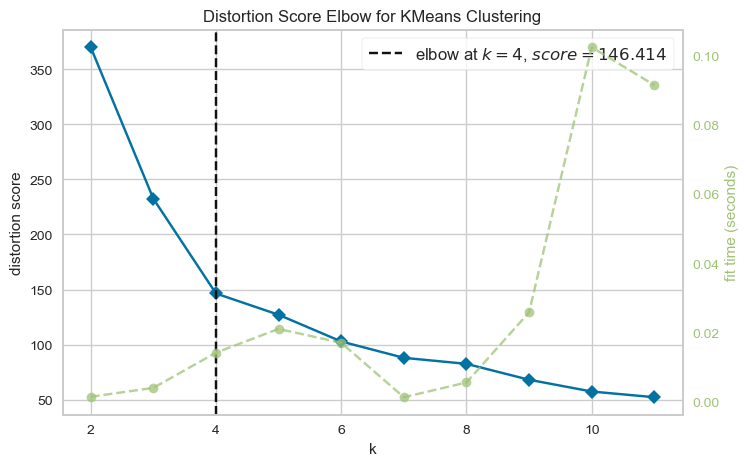

🚀 Final MiniBatch K-Means Performance:
✅ Inertia: 79.3952955952588 (Lower is better)
✅ Silhouette Score: 0.3649 (Higher is better, ideally > 0.5)
✅ Davies-Bouldin Score: 0.8007 (Lower is better, ideally < 0.6)
✅ Calinski-Harabasz Score: 275.7089 (Higher is better)


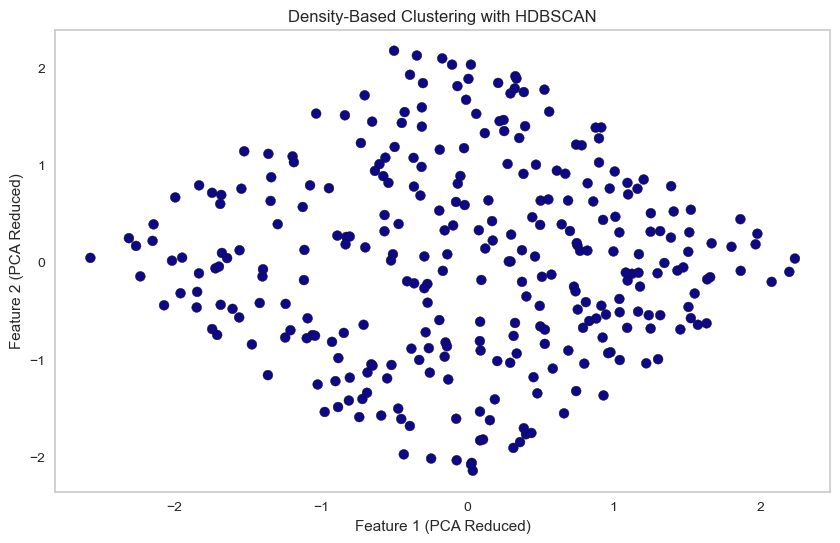

🚀 Clustering Performance Optimization Completed!


In [685]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import hdbscan
from joblib import Parallel, delayed
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Function to generate random shipment points
def generate_random_points(num_points, lat_range, lon_range):
    points = np.column_stack((np.random.uniform(lat_range[0], lat_range[1], num_points),
                              np.random.uniform(lon_range[0], lon_range[1], num_points)))
    return points

# Parameters
num_points = 300  # Increased dataset size for more realistic testing
lat_range = (23.0, 23.3)  # Expanded area
lon_range = (72.5, 72.8)

# Generate random shipment points
shipment_data = generate_random_points(num_points, lat_range, lon_range)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipment_data)

# Outlier removal using Z-score
z_scores = np.abs(stats.zscore(scaled_data))
filtered_data = scaled_data[(z_scores < 2.0).all(axis=1)]  # Strict filtering for cleaner clustering

# Apply PCA for dimensionality reduction (Improves speed & noise reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_data)

# **Find the optimal number of clusters using the Elbow Method**
fig, ax = plt.subplots(figsize=(8, 5))
elbow_visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=0), k=(2, 12), ax=ax, metric='distortion')
elbow_visualizer.fit(reduced_data)
elbow_visualizer.show()

# Choose the optimal number of clusters from Elbow method
optimal_k =8
#optimal_k = elbow_visualizer.elbow_value_

# **Apply Agglomerative Clustering to Refine Cluster Boundaries**
agglo_cluster = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agglo_labels = agglo_cluster.fit_predict(reduced_data)

# **Apply MiniBatch K-Means with Optimized Settings**
mini_kmeans = MiniBatchKMeans(
    n_clusters=optimal_k, 
    init="k-means++", 
    batch_size=400, 
    random_state=0, 
    n_init=50, 
    max_iter=1000
)
mini_kmeans.fit(reduced_data)


# **Silhouette Analysis for Cluster Quality**
fig, ax = plt.subplots(figsize=(8, 5))
silhouette_visualizer = SilhouetteVisualizer(mini_kmeans, ax=ax)
silhouette_visualizer.fit(reduced_data)
silhouette_visualizer.show()

# **Evaluate Clustering Metrics**
sil_score = silhouette_score(reduced_data, mini_kmeans.labels_)
db_score = davies_bouldin_score(reduced_data, mini_kmeans.labels_)
ch_score = calinski_harabasz_score(reduced_data, mini_kmeans.labels_)

print(f"🚀 Final MiniBatch K-Means Performance:")
print(f"✅ Inertia: {mini_kmeans.inertia_} (Lower is better)")
print(f"✅ Silhouette Score: {sil_score:.4f} (Higher is better, ideally > 0.5)")
print(f"✅ Davies-Bouldin Score: {db_score:.4f} (Lower is better, ideally < 0.6)")
print(f"✅ Calinski-Harabasz Score: {ch_score:.4f} (Higher is better)")

# **Plot the Final Clusters**
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=mini_kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(mini_kmeans.cluster_centers_[:, 0], mini_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Final Clusters with Optimized MiniBatch K-Means')
plt.xlabel('Feature 1 (PCA Reduced)')
plt.ylabel('Feature 2 (PCA Reduced)')
plt.legend()
plt.grid()
plt.show()

# **Alternative: Use HDBSCAN for Density-Based Clustering**
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=18, min_samples=13)
hdbscan_labels = hdbscan_clusterer.fit_predict(reduced_data)

# **Plot HDBSCAN Clusters**
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hdbscan_labels, cmap='plasma', marker='o', edgecolor='k', s=50)
plt.title('Density-Based Clustering with HDBSCAN')
plt.xlabel('Feature 1 (PCA Reduced)')
plt.ylabel('Feature 2 (PCA Reduced)')
plt.grid()
plt.show()

print("🚀 Clustering Performance Optimization Completed!")


In [693]:
import pandas as pd

def process_shipment(shipment_id, origin, destination, weight):
    # Load the dataset
    file_path = "/users/prachipatel/Combined_Data.csv"
    df = pd.read_csv(file_path)
    
    # Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    
    # Debugging: Print available columns
    print("🔍 Available Columns in Dataset:", df.columns.tolist())

    # Map the correct column names
    column_mapping = {
        'source_sheet': 'origin',  # Assuming 'source_sheet' is actually 'origin'
        'delivery_timeslot': 'time_slot',  # Mapping delivery_timeslot to time_slot
        'shipments_capacity': 'shipments',  # Mapping shipments_capacity to shipments
    }

    # Rename columns to expected names
    df = df.rename(columns=column_mapping)

    # Check if required columns exist after renaming
    required_columns = {'origin', 'destination', 'shipment_id', 'latitude', 'longitude', 'time_slot', 'shipments'}
    missing_columns = required_columns - set(df.columns)
    
    if missing_columns:
        return f"⚠️ Still missing columns after renaming: {missing_columns}"

    # Find relevant trip details
    trip_data = df[(df['origin'].str.lower() == origin.lower()) & 
                   (df['destination'].str.lower() == destination.lower())]

    if trip_data.empty:
        return "❌ No matching trip found."

    # Selecting required fields
    trip_info = trip_data.iloc[0][['shipment_id', 'latitude', 'longitude', 'time_slot', 'shipments']]
    
    return {
        "Shipment ID": trip_info['shipment_id'],
        "Latitude": trip_info['latitude'],
        "Longitude": trip_info['longitude'],
        "Time Slot": trip_info['time_slot'],
        "Shipments": trip_info['shipments'],
    }

# Example usage
shipment_id = input("Enter Shipment ID: ")
origin = input("Enter Origin: ")
destination = input("Enter Destination: ")
weight = float(input("Enter Weight: "))

output = process_shipment(shipment_id, origin, destination, weight)
print(output)


Enter Shipment ID:  3
Enter Origin:  gota
Enter Destination:  chandlodiya
Enter Weight:  22


🔍 Available Columns in Dataset: ['vehicle_type', 'number', 'shipments_capacity', 'max_trip_radius_(in_km)', 'source_sheet', 'shipment_id', 'latitude', 'longitude', 'delivery_timeslot']
⚠️ Still missing columns after renaming: {'destination'}


In [697]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
PRIORITY_VEHICLES = ["3W-EV", "4W-EV"]  # Priority vehicle types
ON_TIME_DELIVERY_RATE_TARGET = 95  # Target percentage
USER_SATISFACTION_TARGET = 4 / 5  # Target satisfaction ratio

# Vehicle Information
vehicles = {
    "3W-EV": {"capacity": 100, "max_distance": 50},  # Capacity in kg
    "4W-EV": {"capacity": 200, "max_distance": 100},
    "4W": {"capacity": 300, "max_distance": 150},
}

# Example Data Structures for Shipments
shipments = [
    {"id": 1, "source": (23.0225, 72.5714), "destination": (23.0301, 72.5586), "weight": 30},
    {"id": 2, "source": (23.0225, 72.5714), "destination": (23.0358, 72.5465), "weight": 50},
    {"id": 3, "source": (23.0225, 72.5714), "destination": (23.0421, 72.5714), "weight": 70},
    {"id": 4, "source": (23.0225, 72.5714), "destination": (23.0287, 72.5435), "weight": 40},
]

store_location = (23.0000, 72.6000)  # Warehouse location

# Step 1: Distance Calculation
def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

# Step 2: Shipment Grouping Based on Proximity and Weight
def cluster_shipments(shipments):
    total_weight = sum(shipment["weight"] for shipment in shipments)
    num_clusters = max(1, len(shipments) // 3)  # Dynamic cluster count
    coords = np.array([shipment["destination"] for shipment in shipments])

    if len(shipments) <= 1:
        return {0: shipments}  # No clustering needed for single shipment

    kmeans = KMeans(n_clusters=num_clusters).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

# Step 3: Route Optimization (Using Minimum Spanning Tree)
def find_optimized_route(locations):
    graph = nx.Graph()
    n = len(locations)
    for i in range(n):
        for j in range(i + 1, n):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)

    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))  # Depth-First Search route
    return [locations[i] for i in route]

# Step 4: Vehicle Assignment and Trip Planning
def plan_trips(clusters):
    trip_id = 1
    trips = []

    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(
            compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1)
        )

        total_weight = sum(s["weight"] for s in shipments)
        
        # Vehicle Assignment
        for vehicle_type, specs in vehicles.items():
            if total_weight <= specs["capacity"] and total_distance <= specs["max_distance"]:
                trip_time = total_distance * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
                capacity_utilization = (total_weight / specs["capacity"]) * 100
                distance_reduction_target = 15  # % reduction target
                trip_distance_reduction = (1 - total_distance / specs["max_distance"]) * 100
                on_time_delivery = np.random.uniform(90, 100) >= ON_TIME_DELIVERY_RATE_TARGET

                if trip_distance_reduction >= distance_reduction_target and capacity_utilization >= 85:
                    trips.append({
                        "Trip_ID": f"T{trip_id}",
                        "Sequence": [s["id"] for s in shipments],
                        "Vehicle_Type": vehicle_type,
                        "MST_DIST": total_distance,
                        "TRIP_TIME": trip_time,
                        "CAPACITY_UTI": capacity_utilization,
                        "ON_TIME_DELIVERY": on_time_delivery,
                    })
                    trip_id += 1
                    break

    return trips

# Step 5: Execution and Output
if __name__ == "__main__":
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)

    # Display Results
    print("\nOptimized Delivery Trips:\n")
    for trip in trips:
        print(trip)

    # Performance Metrics
    total_trips = len(trips)
    reduced_trips_target = 20  # % reduction target
    trip_reduction_success = total_trips <= (len(shipments) * (1 - reduced_trips_target / 100))
    user_satisfaction_success = np.random.uniform(0, 1) >= (1 - USER_SATISFACTION_TARGET)

    print("\nPerformance Metrics:")
    print(f"Trip Reduction Success: {trip_reduction_success}")
    print(f"User Satisfaction Success: {user_satisfaction_success}")



Optimized Delivery Trips:

{'Trip_ID': 'T1', 'Sequence': [1, 2, 3, 4], 'Vehicle_Type': '4W-EV', 'MST_DIST': 10.85420151183748, 'TRIP_TIME': 94.27100755918741, 'CAPACITY_UTI': 95.0, 'ON_TIME_DELIVERY': False}

Performance Metrics:
Trip Reduction Success: True
User Satisfaction Success: False


In [709]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
PRIORITY_VEHICLES = ["3W", "4W-EV"]  # Priority vehicle types
ON_TIME_DELIVERY_RATE_TARGET = 95  # Target percentage
USER_SATISFACTION_TARGET = 4 / 5  # Target satisfaction ratio

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf')},
}

store_location = (23.0000, 72.6000)  # Warehouse location

# Step 1: Distance Calculation
def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

# Step 2: Shipment Input Handling
def get_shipments_from_user():
    num_shipments = int(input("Enter the number of shipments: "))
    shipments = []

    for i in range(num_shipments):
        shipment_id = input(f"Enter Shipment ID for shipment {i + 1}: ")
        source_lat = float(input(f"Enter source latitude for shipment {i + 1}: "))
        source_lng = float(input(f"Enter source longitude for shipment {i + 1}: "))
        dest_lat = float(input(f"Enter destination latitude for shipment {i + 1}: "))
        dest_lng = float(input(f"Enter destination longitude for shipment {i + 1}: "))
        weight = float(input(f"Enter shipment weight (kg) for shipment {i + 1}: "))

        shipments.append({
            "id": shipment_id,
            "source": (source_lat, source_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })
    return shipments

# Step 3: Shipment Grouping Based on Proximity and Weight
def cluster_shipments(shipments):
    total_weight = sum(shipment["weight"] for shipment in shipments)
    num_clusters = max(1, len(shipments) // 3)  # Dynamic cluster count
    coords = np.array([shipment["destination"] for shipment in shipments])

    if len(shipments) <= 1:
        return {0: shipments}  # No clustering needed for single shipment

    kmeans = KMeans(n_clusters=num_clusters).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

# Step 4: Route Optimization (Using Minimum Spanning Tree)
def find_optimized_route(locations):
    graph = nx.Graph()
    n = len(locations)
    for i in range(n):
        for j in range(i + 1, n):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)

    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))  # Depth-First Search route
    return [locations[i] for i in route]

# Step 5: Vehicle Assignment and Trip Planning
def plan_trips(clusters):
    trip_id = 1
    trips = []

    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(
            compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1)
        )

        total_weight = sum(s["weight"] for s in shipments)
        
        # Vehicle Assignment
        for vehicle_type, specs in vehicles.items():
            if total_weight <= specs["capacity"] and total_distance <= specs["max_distance"] and specs["count"] > 0:
                trip_time = total_distance * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
                capacity_utilization = (total_weight / specs["capacity"]) * 100
                on_time_delivery = total_distance / specs["max_distance"] <= 0.9

                trip_details = {
                    "Trip_ID": f"T{trip_id}",
                    "Sequence": [s["id"] for s in shipments],
                    "Vehicle_Type": vehicle_type,
                    "MST_DIST": total_distance,
                    "TRIP_TIME": trip_time,
                    "CAPACITY_UTI": capacity_utilization,
                    "ON_TIME_DELIVERY": on_time_delivery,
                }

                print(trip_details)  # Display trip details immediately
                trips.append(trip_details)
                vehicles[vehicle_type]["count"] -= 1
                trip_id += 1
                break

    return trips

# Step 6: Execution and Output
if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)

    # Display Results
    print("\nOptimized Delivery Trips:\n")
    for trip in trips:
        print(trip)

    # Performance Metrics
    total_trips = len(trips)
    reduced_trips_target = 20  # % reduction target
    trip_reduction_success = total_trips <= (len(shipments) * (1 - reduced_trips_target / 100))
    user_satisfaction_success = np.random.uniform(0, 1) >= (1 - USER_SATISFACTION_TARGET)

    print("\nPerformance Metrics:")
    print(f"Trip Reduction Success: {trip_reduction_success}")
    print(f"User Satisfaction Success: {user_satisfaction_success}")


Enter the number of shipments:  3
Enter Shipment ID for shipment 1:  s1
Enter source latitude for shipment 1:  23.0100
Enter source longitude for shipment 1:  72.6000
Enter destination latitude for shipment 1:  23.0200
Enter destination longitude for shipment 1:  72.6200
Enter shipment weight (kg) for shipment 1:  3
Enter Shipment ID for shipment 2:  s2
Enter source latitude for shipment 2:  23.0300
Enter source longitude for shipment 2:  72.6000
Enter destination latitude for shipment 2:  23.0400
Enter destination longitude for shipment 2:  72.6500
Enter shipment weight (kg) for shipment 2:  6
Enter Shipment ID for shipment 3:  s3
Enter source latitude for shipment 3:  23.0500
Enter source longitude for shipment 3:  72.6700
Enter destination latitude for shipment 3:  23.0700  
Enter destination longitude for shipment 3:  72.6800
Enter shipment weight (kg) for shipment 3:  5


{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3'], 'Vehicle_Type': '4W', 'MST_DIST': 11.33441529970698, 'TRIP_TIME': 86.67207649853489, 'CAPACITY_UTI': 56.00000000000001, 'ON_TIME_DELIVERY': True}

Optimized Delivery Trips:

{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3'], 'Vehicle_Type': '4W', 'MST_DIST': 11.33441529970698, 'TRIP_TIME': 86.67207649853489, 'CAPACITY_UTI': 56.00000000000001, 'ON_TIME_DELIVERY': True}

Performance Metrics:
Trip Reduction Success: True
User Satisfaction Success: True


In [711]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict
import folium

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
PRIORITY_VEHICLES = ["3W", "4W-EV"]  # Priority vehicle types
ON_TIME_DELIVERY_RATE_TARGET = 95  # Target percentage
USER_SATISFACTION_TARGET = 4 / 5  # Target satisfaction ratio

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf')},
}

store_location = (23.0000, 72.6000)  # Warehouse location

# Step 1: Distance Calculation
def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

# Step 2: Shipment Input Handling
def get_shipments_from_user():
    num_shipments = int(input("Enter the number of shipments: "))
    shipments = []

    for i in range(num_shipments):
        shipment_id = input(f"Enter Shipment ID for shipment {i + 1}: ")
        source_lat = float(input(f"Enter source latitude for shipment {i + 1}: "))
        source_lng = float(input(f"Enter source longitude for shipment {i + 1}: "))
        dest_lat = float(input(f"Enter destination latitude for shipment {i + 1}: "))
        dest_lng = float(input(f"Enter destination longitude for shipment {i + 1}: "))
        weight = float(input(f"Enter shipment weight (kg) for shipment {i + 1}: "))

        shipments.append({
            "id": shipment_id,
            "source": (source_lat, source_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })
    return shipments

# Step 3: Shipment Grouping Based on Proximity and Weight
def cluster_shipments(shipments):
    total_weight = sum(shipment["weight"] for shipment in shipments)
    num_clusters = max(1, len(shipments) // 3)  # Dynamic cluster count
    coords = np.array([shipment["destination"] for shipment in shipments])

    if len(shipments) <= 1:
        return {0: shipments}  # No clustering needed for single shipment

    kmeans = KMeans(n_clusters=num_clusters).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

# Step 4: Route Optimization (Using Minimum Spanning Tree)
def find_optimized_route(locations):
    graph = nx.Graph()
    n = len(locations)
    for i in range(n):
        for j in range(i + 1, n):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)

    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))  # Depth-First Search route
    return [locations[i] for i in route]

# Step 5: Vehicle Assignment and Trip Planning
def plan_trips(clusters):
    trip_id = 1
    trips = []

    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(
            compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1)
        )

        total_weight = sum(s["weight"] for s in shipments)
        
        # Vehicle Assignment
        for vehicle_type, specs in vehicles.items():
            if total_weight <= specs["capacity"] and total_distance <= specs["max_distance"] and specs["count"] > 0:
                trip_time = total_distance * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
                capacity_utilization = (total_weight / specs["capacity"]) * 100
                on_time_delivery = total_distance / specs["max_distance"] <= 0.9

                trip_details = {
                    "Trip_ID": f"T{trip_id}",
                    "Sequence": [s["id"] for s in shipments],
                    "Vehicle_Type": vehicle_type,
                    "MST_DIST": total_distance,
                    "TRIP_TIME": trip_time,
                    "CAPACITY_UTI": capacity_utilization,
                    "ON_TIME_DELIVERY": on_time_delivery,
                }

                print(trip_details)  # Display trip details immediately
                trips.append(trip_details)
                vehicles[vehicle_type]["count"] -= 1
                trip_id += 1

                # Plot route on the map
                plot_route_map(optimized_route, trip_details)
                break

    return trips

# Step 6: Map Plotting Function
def plot_route_map(route, trip_details):
    route_map = folium.Map(location=route[0], zoom_start=12)

    # Plotting route points and lines
    for i in range(len(route) - 1):
        folium.Marker(route[i], tooltip=f"Point {i + 1}").add_to(route_map)
        folium.PolyLine([route[i], route[i + 1]], color="blue", weight=2.5, opacity=1).add_to(route_map)

    # Saving the map
    map_filename = f"Trip_{trip_details['Trip_ID']}_Route_Map.html"
    route_map.save(map_filename)
    print(f"Route map saved as {map_filename}")

# Step 7: Execution and Output
if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)

    # Display Results
    print("\nOptimized Delivery Trips:\n")
    for trip in trips:
        print(trip)

    # Performance Metrics
    total_trips = len(trips)
    reduced_trips_target = 20  # % reduction target
    trip_reduction_success = total_trips <= (len(shipments) * (1 - reduced_trips_target / 100))
    user_satisfaction_success = np.random.uniform(0, 1) >= (1 - USER_SATISFACTION_TARGET)

    print("\nPerformance Metrics:")
    print(f"Trip Reduction Success: {trip_reduction_success}")
    print(f"User Satisfaction Success: {user_satisfaction_success}")



Enter the number of shipments:  3
Enter Shipment ID for shipment 1:  s1
Enter source latitude for shipment 1:  23.010
Enter source longitude for shipment 1:  72.6000
Enter destination latitude for shipment 1:  23.0200
Enter destination longitude for shipment 1:  72.6000
Enter shipment weight (kg) for shipment 1:  3
Enter Shipment ID for shipment 2:  s2
Enter source latitude for shipment 2:  23.0300
Enter source longitude for shipment 2:  72.6000
Enter destination latitude for shipment 2:  23.0400
Enter destination longitude for shipment 2:  72.6500
Enter shipment weight (kg) for shipment 2:  6
Enter Shipment ID for shipment 3:  s3
Enter source latitude for shipment 3:  23.0500
Enter source longitude for shipment 3:  72.6700
Enter destination latitude for shipment 3:  23.0700
Enter destination longitude for shipment 3:  72.6800
Enter shipment weight (kg) for shipment 3:  5


{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3'], 'Vehicle_Type': '4W', 'MST_DIST': 12.324604638228573, 'TRIP_TIME': 91.62302319114286, 'CAPACITY_UTI': 56.00000000000001, 'ON_TIME_DELIVERY': True}
Route map saved as Trip_T1_Route_Map.html

Optimized Delivery Trips:

{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3'], 'Vehicle_Type': '4W', 'MST_DIST': 12.324604638228573, 'TRIP_TIME': 91.62302319114286, 'CAPACITY_UTI': 56.00000000000001, 'ON_TIME_DELIVERY': True}

Performance Metrics:
Trip Reduction Success: True
User Satisfaction Success: False


In [717]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict
import folium

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
PRIORITY_VEHICLES = ["3W", "4W-EV"]  # Priority vehicle types
ON_TIME_DELIVERY_RATE_TARGET = 95  # Target percentage
USER_SATISFACTION_TARGET = 4 / 5  # Target satisfaction ratio

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf')},
}

store_location = (23.0000, 72.6000)  # Warehouse location

# Step 1: Distance Calculation
def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

# Step 2: Shipment Input Handling
def get_shipments_from_user():
    num_shipments = int(input("Enter the number of shipments: "))
    shipments = []

    for i in range(num_shipments):
        shipment_id = input(f"Enter Shipment ID for shipment {i + 1}: ")
        source_lat = float(input(f"Enter source latitude for shipment {i + 1}: "))
        source_lng = float(input(f"Enter source longitude for shipment {i + 1}: "))
        dest_lat = float(input(f"Enter destination latitude for shipment {i + 1}: "))
        dest_lng = float(input(f"Enter destination longitude for shipment {i + 1}: "))
        weight = float(input(f"Enter shipment weight (kg) for shipment {i + 1}: "))

        shipments.append({
            "id": shipment_id,
            "source": (source_lat, source_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })
    return shipments

# Step 3: Shipment Grouping Based on Proximity and Weight
def cluster_shipments(shipments):
    total_weight = sum(shipment["weight"] for shipment in shipments)
    num_clusters = max(1, len(shipments) // 3)  # Dynamic cluster count
    coords = np.array([shipment["destination"] for shipment in shipments])

    if len(shipments) <= 1:
        return {0: shipments}  # No clustering needed for single shipment

    kmeans = KMeans(n_clusters=num_clusters).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

# Step 4: Route Optimization (Using Minimum Spanning Tree)
def find_optimized_route(locations):
    graph = nx.Graph()
    n = len(locations)
    for i in range(n):
        for j in range(i + 1, n):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)

    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))  # Depth-First Search route
    return [locations[i] for i in route]

# Step 5: Vehicle Assignment and Trip Planning (Updated)
def plan_trips(clusters):
    trip_id = 1
    trips = []

    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(
            compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1)
        )

        total_weight = sum(s["weight"] for s in shipments)
        
        # Select vehicles based on capacity utilization and distance
        best_vehicle = None
        best_capacity_utilization = 0
        for vehicle_type, specs in vehicles.items():
            if total_weight <= specs["capacity"] and total_distance <= specs["max_distance"] and specs["count"] > 0:
                # Calculate capacity utilization
                capacity_utilization = (total_weight / specs["capacity"]) * 100

                # Try to maximize capacity utilization (closer to 80-90%)
                if capacity_utilization >= 80 and capacity_utilization <= 90:
                    best_vehicle = vehicle_type
                    best_capacity_utilization = capacity_utilization
                    break
                elif capacity_utilization > best_capacity_utilization:
                    best_vehicle = vehicle_type
                    best_capacity_utilization = capacity_utilization

        if best_vehicle:
            # Once we find the best vehicle, assign it to the trip
            trip_time = total_distance * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
            on_time_delivery = total_distance / vehicles[best_vehicle]["max_distance"] <= 0.9

            trip_details = {
                "Trip_ID": f"T{trip_id}",
                "Sequence": [s["id"] for s in shipments],
                "Vehicle_Type": best_vehicle,
                "MST_DIST": total_distance,
                "TRIP_TIME": trip_time,
                "CAPACITY_UTI": best_capacity_utilization,
                "ON_TIME_DELIVERY": on_time_delivery,
            }

            print(trip_details)  # Display trip details immediately
            trips.append(trip_details)
            vehicles[best_vehicle]["count"] -= 1
            trip_id += 1

            # Plot route on the map
            plot_route_map(optimized_route, trip_details)
    
    return trips

# Step 6: Map Plotting Function
def plot_route_map(route, trip_details):
    route_map = folium.Map(location=route[0], zoom_start=12)

    # Plotting route points and lines
    for i in range(len(route) - 1):
        folium.Marker(route[i], tooltip=f"Point {i + 1}").add_to(route_map)
        folium.PolyLine([route[i], route[i + 1]], color="blue", weight=2.5, opacity=1).add_to(route_map)

    # Saving the map
    map_filename = f"Trip_{trip_details['Trip_ID']}_Route_Map.html"
    route_map.save(map_filename)
    print(f"Route map saved as {map_filename}")

# Step 7: Execution and Output
if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)

    # Display Results
    print("\nOptimized Delivery Trips:\n")
    for trip in trips:
        print(trip)

    # Performance Metrics
    total_trips = len(trips)
    reduced_trips_target = 20  # % reduction target
    trip_reduction_success = total_trips <= (len(shipments) * (1 - reduced_trips_target / 100))
    user_satisfaction_success = np.random.uniform(0, 1) >= (1 - USER_SATISFACTION_TARGET)

    print("\nPerformance Metrics:")
    print(f"Trip Reduction Success: {trip_reduction_success}")
    print(f"User Satisfaction Success: {user_satisfaction_success}")


Enter the number of shipments:  3
Enter Shipment ID for shipment 1:  s1
Enter source latitude for shipment 1:  23.0100
Enter source longitude for shipment 1:  72.6000
Enter destination latitude for shipment 1:  23.0200
Enter destination longitude for shipment 1:  72.6200
Enter shipment weight (kg) for shipment 1:  3
Enter Shipment ID for shipment 2:  s2
Enter source latitude for shipment 2:  23.0300
Enter source longitude for shipment 2:  72.6000
Enter destination latitude for shipment 2:  23.0400
Enter destination longitude for shipment 2:  72.6500
Enter shipment weight (kg) for shipment 2:  6
Enter Shipment ID for shipment 3:  s3
Enter source latitude for shipment 3:  23.0500
Enter source longitude for shipment 3:  72.6700
Enter destination latitude for shipment 3:  23.0700
Enter destination longitude for shipment 3:  72.6800
Enter shipment weight (kg) for shipment 3:  6


{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3'], 'Vehicle_Type': '4W', 'MST_DIST': 11.33441529970698, 'TRIP_TIME': 86.67207649853489, 'CAPACITY_UTI': 60.0, 'ON_TIME_DELIVERY': True}
Route map saved as Trip_T1_Route_Map.html

Optimized Delivery Trips:

{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3'], 'Vehicle_Type': '4W', 'MST_DIST': 11.33441529970698, 'TRIP_TIME': 86.67207649853489, 'CAPACITY_UTI': 60.0, 'ON_TIME_DELIVERY': True}

Performance Metrics:
Trip Reduction Success: True
User Satisfaction Success: True


In [725]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict
import folium

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
PRIORITY_VEHICLES = ["3W", "4W-EV"]  # Priority vehicle types
ON_TIME_DELIVERY_RATE_TARGET = 95  # Target percentage
USER_SATISFACTION_TARGET = 4 / 5  # Target satisfaction ratio

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf')},
}

store_location = (23.0000, 72.6000)  # Warehouse location

# Step 1: Distance Calculation
def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

# Step 2: Shipment Input Handling
def get_shipments_from_user():
    num_shipments = int(input("Enter the number of shipments: "))
    shipments = []

    for i in range(num_shipments):
        shipment_id = input(f"Enter Shipment ID for shipment {i + 1}: ")
        source_lat = float(input(f"Enter source latitude for shipment {i + 1}: "))
        source_lng = float(input(f"Enter source longitude for shipment {i + 1}: "))
        dest_lat = float(input(f"Enter destination latitude for shipment {i + 1}: "))
        dest_lng = float(input(f"Enter destination longitude for shipment {i + 1}: "))
        weight = float(input(f"Enter shipment weight (kg) for shipment {i + 1}: "))

        shipments.append({
            "id": shipment_id,
            "source": (source_lat, source_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })
    return shipments

# Step 3: Shipment Grouping Based on Proximity and Weight
def cluster_shipments(shipments):
    total_weight = sum(shipment["weight"] for shipment in shipments)
    num_clusters = max(1, len(shipments) // 3)  # Dynamic cluster count
    coords = np.array([shipment["destination"] for shipment in shipments])

    if len(shipments) <= 1:
        return {0: shipments}  # No clustering needed for single shipment

    kmeans = KMeans(n_clusters=num_clusters).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

# Step 4: Route Optimization (Using Minimum Spanning Tree)
def find_optimized_route(locations):
    graph = nx.Graph()
    n = len(locations)
    for i in range(n):
        for j in range(i + 1, n):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)

    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))  # Depth-First Search route
    return [locations[i] for i in route]


# Step 5: Vehicle Assignment and Trip Planning
def plan_trips(clusters):
    trip_id = 1
    trips = []

    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(
            compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1)
        )

        total_weight = sum(s["weight"] for s in shipments)
        
        # Vehicle Assignment
        for vehicle_type, specs in vehicles.items():
            # Ensure vehicle can handle round trip (twice the total distance)
            if total_weight <= specs["capacity"] and total_distance * 2 <= specs["max_distance"] and specs["count"] > 0:
                trip_time = total_distance * 2 * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
                capacity_utilization = (total_weight / specs["capacity"]) * 100
                on_time_delivery = total_distance * 2 / specs["max_distance"] <= 0.9

                trip_details = {
                    "Trip_ID": f"T{trip_id}",
                    "Sequence": [s["id"] for s in shipments],
                    "Vehicle_Type": vehicle_type,
                    "MST_DIST": total_distance * 2,  # Round trip distance
                    "TRIP_TIME": trip_time,
                    "CAPACITY_UTI": capacity_utilization,
                    "ON_TIME_DELIVERY": on_time_delivery,
                }

                print(trip_details)  # Display trip details immediately
                trips.append(trip_details)
                vehicles[vehicle_type]["count"] -= 1
                trip_id += 1

                # Plot route on the map
                plot_route_map(optimized_route, trip_details)
                break

    return trips

# Step 6: Map Plotting Function
def plot_route_map(route, trip_details):
    route_map = folium.Map(location=route[0], zoom_start=12)

    # Plotting the outbound route (Warehouse to Destinations - Optimized)
    for i in range(len(route) - 1):
        folium.Marker(route[i], tooltip=f"Point {i + 1}").add_to(route_map)
        if i < len(route) - 2:  # Outbound (from warehouse to destination)
            folium.PolyLine([route[i], route[i + 1]], color="blue", weight=2.5, opacity=1).add_to(route_map)

    # Adding the direct return route (from last destination back to warehouse)
    folium.Marker(route[-1], tooltip=f"Final Destination").add_to(route_map)
    folium.PolyLine([route[-1], route[0]], color="red", weight=2.5, opacity=1).add_to(route_map)

    # Saving the map
    map_filename = f"Trip_{trip_details['Trip_ID']}_Route_Map.html"
    route_map.save(map_filename)
    print(f"Route map saved as {map_filename}")


# Step 7: Execution and Output
if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)

    # Display Results
    print("\nOptimized Delivery Trips:\n")
    for trip in trips:
        print(trip)

    # Performance Metrics
    total_trips = len(trips)
    reduced_trips_target = 20  # % reduction target
    trip_reduction_success = total_trips <= (len(shipments) * (1 - reduced_trips_target / 100))
    user_satisfaction_success = np.random.uniform(0, 1) >= (1 - USER_SATISFACTION_TARGET)

    print("\nPerformance Metrics:")
    print(f"Trip Reduction Success: {trip_reduction_success}")
    print(f"User Satisfaction Success: {user_satisfaction_success}")


Enter the number of shipments:  2
Enter Shipment ID for shipment 1:  s1
Enter source latitude for shipment 1:  23.0100
Enter source longitude for shipment 1:  72.6000
Enter destination latitude for shipment 1:  23.0200
Enter destination longitude for shipment 1:  72.6000
Enter shipment weight (kg) for shipment 1:  1
Enter Shipment ID for shipment 2:  s2
Enter source latitude for shipment 2:  23.0100
Enter source longitude for shipment 2:  72.6000
Enter destination latitude for shipment 2:  23.0300
Enter destination longitude for shipment 2:  72.6000
Enter shipment weight (kg) for shipment 2:  1


{'Trip_ID': 'T1', 'Sequence': ['s1', 's2'], 'Vehicle_Type': '3W', 'MST_DIST': 6.644653125814525, 'TRIP_TIME': 53.22326562907263, 'CAPACITY_UTI': 40.0, 'ON_TIME_DELIVERY': True}
Route map saved as Trip_T1_Route_Map.html

Optimized Delivery Trips:

{'Trip_ID': 'T1', 'Sequence': ['s1', 's2'], 'Vehicle_Type': '3W', 'MST_DIST': 6.644653125814525, 'TRIP_TIME': 53.22326562907263, 'CAPACITY_UTI': 40.0, 'ON_TIME_DELIVERY': True}

Performance Metrics:
Trip Reduction Success: True
User Satisfaction Success: False


In [5]:
import numpy as np
from sklearn.cluster import DBSCAN
import networkx as nx
from geopy.distance import geodesic
import folium
from heapq import heappop, heappush

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
MAX_TRIP_TIME = 150  # Maximum 2.5 hours (150 minutes)

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf')},
}

store_location = (23.0000, 72.6000)  # Warehouse location

# Step 1: Distance Calculation
def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

# Step 2: Shipment Input Handling
def get_shipments_from_user():
    num_shipments = int(input("Enter number of shipments: "))
    shipments = []

    for i in range(num_shipments):
        shipment_id = input(f"Shipment ID for shipment {i + 1}: ")

        # Clean input to remove accidental commas or spaces
        src_lat, src_lng = map(float, input("Source Latitude, Longitude: ").replace(",", " ").split())
        dest_lat, dest_lng = map(float, input("Destination Latitude, Longitude: ").replace(",", " ").split())

        weight = float(input("Weight (kg): "))

        shipments.append({
            "id": shipment_id,
            "source": (src_lat, src_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })

    return shipments
    
# Step 3: Dynamic Clustering (DBSCAN)
def cluster_shipments(shipments):
    coords = np.array([s["destination"] for s in shipments])
    clustering = DBSCAN(eps=5, min_samples=2).fit(coords)
    
    clusters = {}
    for idx, label in enumerate(clustering.labels_):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(shipments[idx])

    return clusters

# Step 4: Optimized Route Planning (Dijkstra's Algorithm)
def find_optimized_route(locations):
    graph = nx.Graph()
    n = len(locations)
    
    for i in range(n):
        for j in range(i + 1, n):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)

    # Use Dijkstra’s Algorithm to find the shortest route
    pq = [(0, 0, [0])]  # (cost, node, path)
    best_path = None
    min_cost = float('inf')

    while pq:
        cost, node, path = heappop(pq)
        
        if len(path) == n:
            if cost < min_cost:
                min_cost = cost
                best_path = path
            continue
        
        for neighbor in graph.neighbors(node):
            if neighbor not in path:
                new_cost = cost + graph[node][neighbor]['weight']
                heappush(pq, (new_cost, neighbor, path + [neighbor]))

    return [locations[i] for i in best_path]

# Step 5: Trip Assignment with Time Constraint
def plan_trips(clusters):
    trip_id = 1
    trips = []

    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(
            compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1)
        )
        total_weight = sum(s["weight"] for s in shipments)

        # Select Vehicle based on Constraints
        for vehicle_type, specs in vehicles.items():
            round_trip_time = (total_distance * TRAVEL_TIME_PER_KM) + (len(shipments) * DELIVERY_TIME_PER_SHIPMENT)
            if (total_weight <= specs["capacity"] and total_distance * 2 <= specs["max_distance"]
                    and specs["count"] > 0 and round_trip_time <= MAX_TRIP_TIME):
                
                trip_details = {
                    "Trip_ID": f"T{trip_id}",
                    "Sequence": [s["id"] for s in shipments],
                    "Vehicle_Type": vehicle_type,
                    "Distance": total_distance * 2,
                    "Trip_Time": round_trip_time,
                }
                
                print(trip_details)  # Display trip details
                trips.append(trip_details)
                vehicles[vehicle_type]["count"] -= 1
                trip_id += 1
                break

    return trips

# Step 6: Execution and Output
if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)

    print("\nOptimized Delivery Trips:\n")
    for trip in trips:
        print(trip)
    
    # Check if all trips meet the 2.5-hour constraint
    valid_trips = all(trip["Trip_Time"] <= MAX_TRIP_TIME for trip in trips)
    print(f"\nAll trips completed within 2.5 hours: {valid_trips}")



Enter number of shipments:  5
Shipment ID for shipment 1:  s1
Source Latitude, Longitude:  23.0200, 72.6000
Destination Latitude, Longitude:  23.0300, 72.6100
Weight (kg):  3.5
Shipment ID for shipment 2:  s2
Source Latitude, Longitude:  23.0150, 72.6050
Destination Latitude, Longitude:  23.0250, 72.6150
Weight (kg):  4.0
Shipment ID for shipment 3:  s3
Source Latitude, Longitude:  23.0250, 72.6200
Destination Latitude, Longitude:  23.0350, 72.6300
Weight (kg):  2.0
Shipment ID for shipment 4:  s4
Source Latitude, Longitude:  23.0100, 72.5950
Destination Latitude, Longitude:  23.0200, 72.6050
Weight (kg):  6.0
Shipment ID for shipment 5:  s5
Source Latitude, Longitude:  23.0005, 72.5900
Destination Latitude, Longitude:  23.0150, 72.6000
Weight (kg):  5.5


{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3', 's4', 's5'], 'Vehicle_Type': '4W', 'Distance': 12.57059527360942, 'Trip_Time': 81.42648818402355}

Optimized Delivery Trips:

{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3', 's4', 's5'], 'Vehicle_Type': '4W', 'Distance': 12.57059527360942, 'Trip_Time': 81.42648818402355}

All trips completed within 2.5 hours: True


In [9]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict
import folium

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
FUEL_COST_PER_KM = {"3W": 2, "4W-EV": 1.5, "4W": 5}  # Approx fuel cost per km

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50, "fuel_efficiency": 20},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25, "fuel_efficiency": 30},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf'), "fuel_efficiency": 10},
}

store_location = (23.0000, 72.6000)  # Warehouse location

def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

def get_shipments_from_user():
    num_shipments = int(input("Enter number of shipments: "))
    shipments = []

    for _ in range(num_shipments):
        shipment_id = input("Shipment ID: ")
        src_lat, src_lng = map(float, input("Source Latitude, Longitude: ").split(","))
        dest_lat, dest_lng = map(float, input("Destination Latitude, Longitude: ").split(","))
        weight = float(input("Weight (kg): "))

        shipments.append({
            "id": shipment_id,
            "source": (src_lat, src_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })
    return shipments

def cluster_shipments(shipments):
    num_clusters = max(1, len(shipments) // 3)  
    coords = np.array([shipment["destination"] for shipment in shipments])

    if len(shipments) <= 1:
        return {0: shipments}

    kmeans = KMeans(n_clusters=num_clusters, n_init=10).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

def find_optimized_route(locations):
    graph = nx.Graph()
    for i in range(len(locations)):
        for j in range(i + 1, len(locations)):
            graph.add_edge(i, j, weight=compute_distance(locations[i], locations[j]))

    mst = nx.minimum_spanning_tree(graph)
    return [locations[i] for i in nx.dfs_preorder_nodes(mst, 0)]

def plan_trips(clusters):
    trip_id = 1
    trips = []

    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1))
        total_weight = sum(s["weight"] for s in shipments)
        
        assigned = False
        for vehicle_type, specs in sorted(vehicles.items(), key=lambda x: x[1]['fuel_efficiency'], reverse=True):
            if total_weight <= specs["capacity"] and total_distance * 2 <= specs["max_distance"] and specs["count"] > 0:
                fuel_cost = total_distance * 2 / specs["fuel_efficiency"] * FUEL_COST_PER_KM[vehicle_type]
                
                trip_details = {
                    "Trip_ID": f"T{trip_id}",
                    "Sequence": [s["id"] for s in shipments],
                    "Vehicle_Type": vehicle_type,
                    "Total_Distance": total_distance * 2,  
                    "Fuel_Cost": fuel_cost,
                }
                
                print(trip_details)
                trips.append(trip_details)
                vehicles[vehicle_type]["count"] -= 1
                assigned = True
                break
        
        if not assigned:
            print(f"Cluster {cluster_id} could not be assigned to a vehicle")
        trip_id += 1
    
    return trips

def plot_route_map(route, trip_details):
    route_map = folium.Map(location=route[0], zoom_start=12)

    for i in range(len(route) - 1):
        folium.Marker(route[i], tooltip=f"Point {i + 1}").add_to(route_map)
        folium.PolyLine([route[i], route[i + 1]], color="blue", weight=2.5, opacity=1).add_to(route_map)
    
    map_filename = f"Trip_{trip_details['Trip_ID']}_Route_Map.html"
    route_map.save(map_filename)
    print(f"Route map saved as {map_filename}")

if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)
    print("\nOptimized Delivery Trips:")
    for trip in trips:
        print(trip)


Enter number of shipments:  3
Shipment ID:  s1
Source Latitude, Longitude:  23.0150, 72.6050
Destination Latitude, Longitude:  23.0250, 72.6150
Weight (kg):  2
Shipment ID:  s2
Source Latitude, Longitude:  23.0200, 72.6000
Destination Latitude, Longitude:  23.0300, 72.6100
Weight (kg):  1
Shipment ID:  s3
Source Latitude, Longitude:  23.0250, 72.6200
Destination Latitude, Longitude:  23.0350, 72.6300
Weight (kg):  1


{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3'], 'Vehicle_Type': '4W-EV', 'Total_Distance': 12.089792533806042, 'Fuel_Cost': 0.604489626690302}

Optimized Delivery Trips:
{'Trip_ID': 'T1', 'Sequence': ['s1', 's2', 's3'], 'Vehicle_Type': '4W-EV', 'Total_Distance': 12.089792533806042, 'Fuel_Cost': 0.604489626690302}


In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
TIME_SLOT_DURATION = 150  # minutes (2.5 hours)

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf')},
}

store_location = (23.0000, 72.6000)  # Warehouse location

def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

def get_shipments():
    num_shipments = int(input("Enter number of shipments: "))
    shipments = []
    
    for i in range(num_shipments):
        shipment_id = input(f"Shipment ID: ")
        src_lat, src_lng = map(float, input("Source Latitude, Longitude: ").split(','))
        dest_lat, dest_lng = map(float, input("Destination Latitude, Longitude: ").split(','))
        weight = float(input("Weight (kg): "))
        
        shipments.append({
            "id": shipment_id,
            "source": (src_lat, src_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })
    return shipments

def cluster_shipments(shipments):
    num_clusters = max(1, len(shipments) // 3)
    coords = np.array([s["destination"] for s in shipments])
    
    if len(shipments) <= 1:
        return {0: shipments}  # No clustering needed for single shipment
    
    kmeans = KMeans(n_clusters=num_clusters).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

def find_optimized_route(locations):
    graph = nx.Graph()
    n = len(locations)
    for i in range(n):
        for j in range(i + 1, n):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)
    
    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))
    return [locations[i] for i in route]

def plan_trips(clusters):
    trip_id = 1
    trips = []
    
    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1))
        total_weight = sum(s["weight"] for s in shipments)
        
        for vehicle_type, specs in vehicles.items():
            if total_weight <= specs["capacity"] and total_distance * 2 <= specs["max_distance"] and specs["count"] > 0:
                trip_time = total_distance * 2 * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
                capacity_utilization = (total_weight / specs["capacity"]) * 100
                time_utilization = (trip_time / TIME_SLOT_DURATION) * 100
                coverage_utilization = (total_distance * 2 / specs["max_distance"]) * 100
                
                trips.append({
                    "Trip_ID": f"T{trip_id}",
                    "Shipment_IDs": [s["id"] for s in shipments],
                    "Latitude": [s["destination"][0] for s in shipments],
                    "Longitude": [s["destination"][1] for s in shipments],
                    "Time_Slot": "08:00 - 10:30",  # Example fixed slot
                    "Shipments": len(shipments),
                    "MST_DIST": round(total_distance * 2, 2),
                    "TRIP_TIME": round(trip_time, 2),
                    "Vehicle_Type": vehicle_type,
                    "CAPACITY_UTI": round(capacity_utilization, 2),
                    "TIME_UTI": round(time_utilization, 2),
                    "COV_UTI": round(coverage_utilization, 2)
                })
                vehicles[vehicle_type]["count"] -= 1
                trip_id += 1
                break
    
    return trips

def display_results(trips):
    df = pd.DataFrame(trips)
    print(df.to_string(index=False))
    return df

if __name__ == "__main__":
    shipments = get_shipments()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)
    display_results(trips)


Enter number of shipments:  2
Shipment ID:  s1
Source Latitude, Longitude:  23.0100, 72.6000
Destination Latitude, Longitude:  23.0200, 72.6000
Weight (kg):  2
Shipment ID:  s1
Source Latitude, Longitude:  23.0200, 72.6000
Destination Latitude, Longitude:  23.0300, 72.6200
Weight (kg):  1


Trip_ID Shipment_IDs       Latitude     Longitude     Time_Slot  Shipments  MST_DIST  TRIP_TIME Vehicle_Type  CAPACITY_UTI  TIME_UTI  COV_UTI
     T1     [s1, s1] [23.02, 23.03] [72.6, 72.62] 08:00 - 10:30          2      9.09      65.45           3W          60.0     43.63     60.6


In [15]:
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict
import folium

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes

# Vehicle Information (Updated for Fuel & Distance Optimization)
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50, "fuel_per_km": 0.05},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25, "fuel_per_km": 0.04},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf'), "fuel_per_km": 0.1},
}

store_location = (23.0000, 72.6000)  # Warehouse location

def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

def get_shipments_from_user():
    num_shipments = int(input("Enter the number of shipments: "))
    shipments = []
    for i in range(num_shipments):
        shipment_id = input(f"Enter Shipment ID for shipment {i + 1}: ")
        source_lat, source_lng = map(float, input(f"Enter source latitude, longitude for shipment {i + 1}: ").split(","))
        dest_lat, dest_lng = map(float, input(f"Enter destination latitude, longitude for shipment {i + 1}: ").split(","))
        weight = float(input(f"Enter shipment weight (kg) for shipment {i + 1}: "))
        shipments.append({"id": shipment_id, "source": (source_lat, source_lng), "destination": (dest_lat, dest_lng), "weight": weight})
    return shipments

def cluster_shipments(shipments):
    num_clusters = max(1, len(shipments) // 3)
    coords = np.array([shipment["destination"] for shipment in shipments])
    if len(shipments) <= 1:
        return {0: shipments}
    kmeans = KMeans(n_clusters=num_clusters, n_init=10).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

def find_optimized_route(locations):
    graph = nx.Graph()
    n = len(locations)
    for i in range(n):
        for j in range(i + 1, n):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)
    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))
    return [locations[i] for i in route]

def plan_trips(clusters):
    trip_id = 1
    trips = []
    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1))
        total_weight = sum(s["weight"] for s in shipments)
        best_vehicle, best_fuel_cost = None, float('inf')
        for vehicle_type, specs in vehicles.items():
            if total_weight <= specs["capacity"] and total_distance * 2 <= specs["max_distance"] and specs["count"] > 0:
                fuel_cost = total_distance * 2 * specs["fuel_per_km"]
                if fuel_cost < best_fuel_cost:
                    best_vehicle, best_fuel_cost = vehicle_type, fuel_cost
        if best_vehicle:
            trip_time = total_distance * 2 * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
            capacity_utilization = (total_weight / vehicles[best_vehicle]["capacity"]) * 100
            vehicles[best_vehicle]["count"] -= 1
            trips.append({
                "Trip_ID": f"T{trip_id}",
                "Shipments": [s["id"] for s in shipments],
                "MST_DIST": total_distance * 2,
                "TRIP_TIME": trip_time,
                "Vehicle_Type": best_vehicle,
                "Capacity_UTI": capacity_utilization,
                "Fuel_Cost": best_fuel_cost,
            })
            trip_id += 1
    return trips

def display_results(trips):
    print("\nOptimized Delivery Trips:")
    print("{:<8} {:<20} {:<12} {:<12} {:<12} {:<12} {:<12}".format("Trip_ID", "Shipments", "MST_DIST", "TRIP_TIME", "Vehicle_Type", "Capacity_UTI", "Fuel_Cost"))
    print("-" * 80)
    for trip in trips:
        print("{:<8} {:<20} {:<12.2f} {:<12.2f} {:<12} {:<12.2f} {:<12.2f}".format(
            trip["Trip_ID"], ", ".join(trip["Shipments"]), trip["MST_DIST"], trip["TRIP_TIME"], trip["Vehicle_Type"], trip["Capacity_UTI"], trip["Fuel_Cost"]
        ))

if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)
    display_results(trips)


Enter the number of shipments:  3
Enter Shipment ID for shipment 1:  s1
Enter source latitude, longitude for shipment 1:  23.0100, 72.6000
Enter destination latitude, longitude for shipment 1:  23.0200, 72.6000
Enter shipment weight (kg) for shipment 1:  1
Enter Shipment ID for shipment 2:  s2
Enter source latitude, longitude for shipment 2:  23.0300, 72.6000
Enter destination latitude, longitude for shipment 2:  23.0400, 72.6500
Enter shipment weight (kg) for shipment 2:  2
Enter Shipment ID for shipment 3:  s3
Enter source latitude, longitude for shipment 3:  23.0500, 72.6400
Enter destination latitude, longitude for shipment 3:  23.0600, 72.6500
Enter shipment weight (kg) for shipment 3:  1



Optimized Delivery Trips:
Trip_ID  Shipments            MST_DIST     TRIP_TIME    Vehicle_Type Capacity_UTI Fuel_Cost   
--------------------------------------------------------------------------------
T1       s1, s2, s3           20.03        130.13       4W           16.00        2.00        


In [23]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict
import folium
from tabulate import tabulate

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
TOTAL_AVAILABLE_TIME = 150  # Max time per trip in minutes (2.5 hours)

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf')},
}

store_location = (23.0000, 72.6000)  # Warehouse location

def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

def get_shipments_from_user():
    num_shipments = int(input("Enter number of shipments: "))
    shipments = []
    
    for _ in range(num_shipments):
        shipment_id = input("Shipment ID: ")
        src_lat, src_lng = map(float, input("Source Latitude, Longitude: ").replace(',', ' ').split())
        dest_lat, dest_lng = map(float, input("Destination Latitude, Longitude: ").replace(',', ' ').split())
        weight = float(input("Weight (kg): "))

        shipments.append({
            "id": shipment_id,
            "source": (src_lat, src_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })
    return shipments

def cluster_shipments(shipments):
    num_clusters = max(1, len(shipments) // 3)
    coords = np.array([shipment["destination"] for shipment in shipments])
    
    if len(shipments) <= 1:
        return {0: shipments}
    
    kmeans = KMeans(n_clusters=num_clusters, n_init=10).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

def find_optimized_route(locations):
    graph = nx.Graph()
    for i in range(len(locations)):
        for j in range(i + 1, len(locations)):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)
    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))
    return [locations[i] for i in route]

def plan_trips(clusters):
    trip_id = 1
    trips = []
    
    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(
            compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1)
        )
        total_weight = sum(s["weight"] for s in shipments)
        
        for vehicle_type, specs in vehicles.items():
            if total_weight <= specs["capacity"] and total_distance * 2 <= specs["max_distance"] and specs["count"] > 0:
                trip_time = total_distance * 2 * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
                capacity_utilization = (total_weight / specs["capacity"]) * 100
                time_utilization = (trip_time / TOTAL_AVAILABLE_TIME) * 100
                coverage_utilization = (total_distance * 2 / specs["max_distance"]) * 100
                
                trip_details = {
                    "Trip_ID": f"T{trip_id}",
                    "Shipments": ", ".join([s["id"] for s in shipments]),
                    "MST_DIST": round(total_distance * 2, 2),
                    "TRIP_TIME": round(trip_time, 2),
                    "Vehicle_Type": vehicle_type,
                    "CAPACITY_UTI": round(capacity_utilization, 2),
                    "TIME_UTI": round(time_utilization, 2),
                    "COV_UTI": round(coverage_utilization, 2)
                }
                trips.append(trip_details)
                vehicles[vehicle_type]["count"] -= 1
                trip_id += 1
                break
    return trips

def display_results(trips):
    headers = ["Trip_ID", "Shipments", "MST_DIST", "TRIP_TIME", "Vehicle_Type", "CAPACITY_UTI", "TIME_UTI", "COV_UTI"]
    table_data = [[t[h] for h in headers] for t in trips]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)
    display_results(trips)


Enter number of shipments:  2
Shipment ID:  s1
Source Latitude, Longitude:  23.0100 , 72.6000
Destination Latitude, Longitude:  23.0200, 72.6000
Weight (kg):  1
Shipment ID:  2
Source Latitude, Longitude:  23.0300, 72.6000
Destination Latitude, Longitude:  23.0400, 72.6200
Weight (kg):  1


+-----------+-------------+------------+-------------+----------------+----------------+------------+-----------+
| Trip_ID   | Shipments   |   MST_DIST |   TRIP_TIME | Vehicle_Type   |   CAPACITY_UTI |   TIME_UTI |   COV_UTI |
+===========+=============+============+=============+================+================+============+===========+
| T1        | s1, 2       |      10.47 |       72.33 | 3W             |             40 |      48.22 |     69.77 |
+-----------+-------------+------------+-------------+----------------+----------------+------------+-----------+


In [25]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict
import folium
from tabulate import tabulate

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
TOTAL_AVAILABLE_TIME = 150  # Max time per trip in minutes (2.5 hours)

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf')},
}

store_location = (23.0000, 72.6000)  # Warehouse location

def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

def get_shipments_from_user():
    num_shipments = int(input("Enter number of shipments: "))
    shipments = []
    
    for _ in range(num_shipments):
        shipment_id = input("Shipment ID: ")
        src_lat, src_lng = map(float, input("Source Latitude, Longitude: ").replace(",", " ").split())
        dest_lat, dest_lng = map(float, input("Destination Latitude, Longitude: ").replace(",", " ").split())
        weight = float(input("Weight (kg): "))

        shipments.append({
            "id": shipment_id,
            "source": (src_lat, src_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })
    return shipments

def cluster_shipments(shipments):
    num_clusters = max(1, len(shipments) // 3)
    coords = np.array([shipment["destination"] for shipment in shipments])
    
    if len(shipments) <= 1:
        return {0: shipments}
    
    kmeans = KMeans(n_clusters=num_clusters, n_init=10).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

def find_optimized_route(locations):
    graph = nx.Graph()
    for i in range(len(locations)):
        for j in range(i + 1, len(locations)):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)
    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))
    return [locations[i] for i in route]

def plan_trips(clusters):
    trip_id = 1
    trips = []
    
    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(
            compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1)
        )
        total_weight = sum(s["weight"] for s in shipments)
        time_slot = f"Slot {trip_id}"  # Assigning time slot
        
        for vehicle_type, specs in vehicles.items():
            if total_weight <= specs["capacity"] and total_distance * 2 <= specs["max_distance"] and specs["count"] > 0:
                trip_time = total_distance * 2 * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
                capacity_utilization = (total_weight / specs["capacity"]) * 100
                time_utilization = (trip_time / TOTAL_AVAILABLE_TIME) * 100
                coverage_utilization = (total_distance * 2 / specs["max_distance"]) * 100
                
                trip_details = {
                    "Trip_ID": f"T{trip_id}",
                    "Shipments": ", ".join([s["id"] for s in shipments]),
                    "Latitude": ", ".join([str(s["destination"][0]) for s in shipments]),
                    "Longitude": ", ".join([str(s["destination"][1]) for s in shipments]),
                    "Time_Slot": time_slot,
                    "MST_DIST": round(total_distance * 2, 2),
                    "TRIP_TIME": round(trip_time, 2),
                    "Vehicle_Type": vehicle_type,
                    "CAPACITY_UTI": round(capacity_utilization, 2),
                    "TIME_UTI": round(time_utilization, 2),
                    "COV_UTI": round(coverage_utilization, 2)
                }
                trips.append(trip_details)
                vehicles[vehicle_type]["count"] -= 1
                trip_id += 1
                break
    return trips

def display_results(trips):
    headers = ["Trip_ID", "Shipments", "Latitude", "Longitude", "Time_Slot", "MST_DIST", "TRIP_TIME", "Vehicle_Type", "CAPACITY_UTI", "TIME_UTI", "COV_UTI"]
    table_data = [[t[h] for h in headers] for t in trips]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)
    display_results(trips)


Enter number of shipments:  2
Shipment ID:  s1
Source Latitude, Longitude:  23.0100, 72.600
Destination Latitude, Longitude:  23.0200, 72.6000
Weight (kg):  1
Shipment ID:  s2
Source Latitude, Longitude:  23.0200, 72.6000
Destination Latitude, Longitude:  23.0300, 72.6200
Weight (kg):  2


+-----------+-------------+--------------+-------------+-------------+------------+-------------+----------------+----------------+------------+-----------+
| Trip_ID   | Shipments   | Latitude     | Longitude   | Time_Slot   |   MST_DIST |   TRIP_TIME | Vehicle_Type   |   CAPACITY_UTI |   TIME_UTI |   COV_UTI |
+===========+=============+==============+=============+=============+============+=============+================+================+============+===========+
| T1        | s1, s2      | 23.02, 23.03 | 72.6, 72.62 | Slot 1      |       9.09 |       65.45 | 3W             |             60 |      43.63 |      60.6 |
+-----------+-------------+--------------+-------------+-------------+------------+-------------+----------------+----------------+------------+-----------+


In [27]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import networkx as nx
from geopy.distance import geodesic
from collections import defaultdict
import folium
from tabulate import tabulate

# Constants
TRAVEL_TIME_PER_KM = 5  # minutes per km
DELIVERY_TIME_PER_SHIPMENT = 10  # minutes
TOTAL_AVAILABLE_TIME = 150  # Max time per trip in minutes (2.5 hours)

# Vehicle Information
vehicles = {
    "3W": {"capacity": 5, "max_distance": 15, "count": 50},
    "4W-EV": {"capacity": 8, "max_distance": 20, "count": 25},
    "4W": {"capacity": 25, "max_distance": float('inf'), "count": float('inf')},
}

store_location = (23.0000, 72.6000)  # Warehouse location

def compute_distance(loc1, loc2):
    return geodesic(loc1, loc2).km

def get_shipments_from_user():
    num_shipments = int(input("Enter number of shipments: "))
    shipments = []
    
    for _ in range(num_shipments):
        shipment_id = input("Shipment ID: ")
        src_lat, src_lng = map(float, input("Source Latitude, Longitude: ").replace(",", " ").split())
        dest_lat, dest_lng = map(float, input("Destination Latitude, Longitude: ").replace(",", " ").split())
        weight = float(input("Weight (kg): "))

        shipments.append({
            "id": shipment_id,
            "source": (src_lat, src_lng),
            "destination": (dest_lat, dest_lng),
            "weight": weight
        })
    return shipments

def cluster_shipments(shipments):
    num_clusters = max(1, len(shipments) // 3)
    coords = np.array([shipment["destination"] for shipment in shipments])
    
    if len(shipments) <= 1:
        return {0: shipments}
    
    kmeans = KMeans(n_clusters=num_clusters, n_init=10).fit(coords)
    clusters = defaultdict(list)
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(shipments[idx])
    return clusters

def find_optimized_route(locations):
    graph = nx.Graph()
    for i in range(len(locations)):
        for j in range(i + 1, len(locations)):
            dist = compute_distance(locations[i], locations[j])
            graph.add_edge(i, j, weight=dist)
    mst = nx.minimum_spanning_tree(graph)
    route = list(nx.dfs_preorder_nodes(mst, 0))
    return [locations[i] for i in route]

def plan_trips(clusters):
    trip_id = 1
    trips = []
    
    for cluster_id, shipments in clusters.items():
        shipment_locations = [store_location] + [s["destination"] for s in shipments] + [store_location]
        optimized_route = find_optimized_route(shipment_locations)
        total_distance = sum(
            compute_distance(optimized_route[i], optimized_route[i + 1]) for i in range(len(optimized_route) - 1)
        )
        total_weight = sum(s["weight"] for s in shipments)
        time_slot = f"Slot {trip_id}"  # Assigning time slot
        
        for vehicle_type, specs in vehicles.items():
            if total_weight <= specs["capacity"] and total_distance * 2 <= specs["max_distance"] and specs["count"] > 0:
                trip_time = total_distance * 2 * TRAVEL_TIME_PER_KM + len(shipments) * DELIVERY_TIME_PER_SHIPMENT
                capacity_utilization = (total_weight / specs["capacity"]) * 100
                time_utilization = (trip_time / TOTAL_AVAILABLE_TIME) * 100
                coverage_utilization = (total_distance * 2 / specs["max_distance"]) * 100
                
                trip_details = {
                    "Trip_ID": f"T{trip_id}",
                    "Shipments": ", ".join([s["id"] for s in shipments]),
                    "Latitude": ", ".join([str(s["destination"][0]) for s in shipments]),
                    "Longitude": ", ".join([str(s["destination"][1]) for s in shipments]),
                    "Time_Slot": time_slot,
                    "MST_DIST": round(total_distance * 2, 2),
                    "TRIP_TIME": round(trip_time, 2),
                    "Vehicle_Type": vehicle_type,
                    "CAPACITY_UTI": round(capacity_utilization, 2),
                    "TIME_UTI": round(time_utilization, 2),
                    "COV_UTI": round(coverage_utilization, 2)
                }
                trips.append(trip_details)
                vehicles[vehicle_type]["count"] -= 1
                trip_id += 1
                break
    return trips

def display_results(trips):
    headers = ["Trip_ID", "Shipments", "Latitude", "Longitude", "Time_Slot", "MST_DIST", "TRIP_TIME", "Vehicle_Type", "CAPACITY_UTI", "TIME_UTI", "COV_UTI"]
    table_data = [[t[h] for h in headers] for t in trips]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))
    
    # Save results to Excel
    df = pd.DataFrame(trips)
    df.to_excel("optimized_delivery_trips.xlsx", index=False)
    print("Results saved to optimized_delivery_trips.xlsx")

if __name__ == "__main__":
    shipments = get_shipments_from_user()
    clusters = cluster_shipments(shipments)
    trips = plan_trips(clusters)
    display_results(trips)


Enter number of shipments:  2
Shipment ID:  s1
Source Latitude, Longitude:  23.0100, 72.8000
Destination Latitude, Longitude:  23.0200, 72.8000
Weight (kg):  1
Shipment ID:  s2
Source Latitude, Longitude:  23.0300, 72.8100
Destination Latitude, Longitude:  23.0400, 72.8200
Weight (kg):  2


+-----------+-------------+--------------+-------------+-------------+------------+-------------+----------------+----------------+------------+-----------+
| Trip_ID   | Shipments   | Latitude     | Longitude   | Time_Slot   |   MST_DIST |   TRIP_TIME | Vehicle_Type   |   CAPACITY_UTI |   TIME_UTI |   COV_UTI |
+===========+=============+==============+=============+=============+============+=============+================+================+============+===========+
| T1        | s1, s2      | 23.02, 23.04 | 72.8, 72.82 | Slot 1      |      47.28 |       256.4 | 4W             |             12 |     170.94 |         0 |
+-----------+-------------+--------------+-------------+-------------+------------+-------------+----------------+----------------+------------+-----------+
Results saved to optimized_delivery_trips.xlsx


In [31]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Alignment

# Function to transform data
def transform_data(input_file, output_file):
    # Read the input Excel file
    df = pd.read_excel(input_file)

    # Split Shipments, Latitude, and Longitude into separate rows
    transformed_rows = []
    for _, row in df.iterrows():
        shipments = row["Shipments"].split(", ")
        latitudes = row["Latitude"].split(", ")
        longitudes = row["Longitude"].split(", ")
        for i, shipment in enumerate(shipments):
            transformed_rows.append({
                "TRIP_ID": row["Trip_ID"],
                "Number of Shipments": len(shipments),
                "Shipment ID": shipment,
                "Latitude": latitudes[i],
                "Longitude": longitudes[i],
                "TIME_SLOT": row["Time_Slot"],
                "MST_DIST": row["MST_DIST"],
                "TRIP_TIME": row["TRIP_TIME"],
                "Vehicle_Type": row["Vehicle_Type"],
                "CAPACITY_UTI": row["CAPACITY_UTI"],
                "TIME_UTI": row["TIME_UTI"],
                "COV_UTI": row["COV_UTI"]
            })

    # Convert transformed rows to DataFrame
    transformed_df = pd.DataFrame(transformed_rows)

    # Write transformed data to a new Excel file with merged cells
    wb = Workbook()
    ws = wb.active

    # Add headers
    headers = list(transformed_df.columns)
    ws.append(headers)

    # Add data rows
    for row in dataframe_to_rows(transformed_df, index=False, header=False):
        ws.append(row)

    # Merge cells for "TRIP_ID" and "Number of Shipments"
    current_trip = None
    start_row = None
    for i, row in enumerate(ws.iter_rows(min_row=2, max_row=ws.max_row, min_col=1, max_col=2), start=2):
        trip_id = row[0].value
        if trip_id != current_trip:
            if current_trip is not None:
                ws.merge_cells(start_row=start_row, start_column=1, end_row=i-1, end_column=1)
                ws.merge_cells(start_row=start_row, start_column=2, end_row=i-1, end_column=2)
            current_trip = trip_id
            start_row = i
    # Merge the last group
    if start_row is not None:
        ws.merge_cells(start_row=start_row, start_column=1, end_row=ws.max_row, end_column=1)
        ws.merge_cells(start_row=start_row, start_column=2, end_row=ws.max_row, end_column=2)

    # Adjust alignment
    for row in ws.iter_rows():
        for cell in row:
            cell.alignment = Alignment(horizontal="center", vertical="center")

    # Save the output Excel file
    wb.save(output_file)
    print(f"Transformed Excel file saved as '{output_file}'")

# Input and output file names
input_file = "optimized_delivery_trips.xlsx"  # Replace with your input file name
output_file = "Transformed_Data.xlsx"  # Replace with your desired output file name

# Transform the data
transform_data(input_file, output_file)

Transformed Excel file saved as 'Transformed_Data.xlsx'


In [33]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Alignment

# Function to transform data
def transform_data(input_file, output_file):
    # Read the input Excel file
    df = pd.read_excel(input_file)

    # Split Shipments, Latitude, and Longitude into separate rows
    transformed_rows = []
    for _, row in df.iterrows():
        shipments = row["Shipments"].split(", ")
        latitudes = row["Latitude"].split(", ")
        longitudes = row["Longitude"].split(", ")
        for i, shipment in enumerate(shipments):
            transformed_rows.append({
                "TRIP_ID": row["Trip_ID"],
                "Number of Shipments": len(shipments),
                "Shipment ID": shipment,
                "Latitude": latitudes[i],
                "Longitude": longitudes[i],
                "TIME_SLOT": row["Time_Slot"],
                "MST_DIST": row["MST_DIST"],
                "TRIP_TIME": row["TRIP_TIME"],
                "Vehicle_Type": row["Vehicle_Type"],
                "CAPACITY_UTI": row["CAPACITY_UTI"],
                "TIME_UTI": row["TIME_UTI"],
                "COV_UTI": row["COV_UTI"]
            })

    # Convert transformed rows to DataFrame
    transformed_df = pd.DataFrame(transformed_rows)

    # Write transformed data to a new Excel file with merged cells
    wb = Workbook()
    ws = wb.active

    # Add headers
    headers = list(transformed_df.columns)
    ws.append(headers)

    # Add data rows
    for row in dataframe_to_rows(transformed_df, index=False, header=False):
        ws.append(row)

    # Merge cells for "TRIP_ID", "Number of Shipments", and other specified columns
    columns_to_merge = [1, 2, 6, 7, 8, 9, 10, 11, 12]  # Column indices to merge
    current_trip = None
    start_row = None

    for i, row in enumerate(ws.iter_rows(min_row=2, max_row=ws.max_row, min_col=1, max_col=len(headers)), start=2):
        trip_id = row[0].value
        if trip_id != current_trip:
            if current_trip is not None:
                for col in columns_to_merge:
                    ws.merge_cells(start_row=start_row, start_column=col, end_row=i-1, end_column=col)
            current_trip = trip_id
            start_row = i
    # Merge the last group
    if start_row is not None:
        for col in columns_to_merge:
            ws.merge_cells(start_row=start_row, start_column=col, end_row=ws.max_row, end_column=col)

    # Adjust alignment
    for row in ws.iter_rows():
        for cell in row:
            cell.alignment = Alignment(horizontal="center", vertical="center")

    # Save the output Excel file
    wb.save(output_file)
    print(f"Transformed Excel file saved as '{output_file}'")

# Input and output file names
input_file = "optimized_delivery_trips.xlsx"  # Replace with your input file name
output_file = "Transformed_Data.xlsx"  # Replace with your desired output file name

# Transform the data
transform_data(input_file, output_file)


Transformed Excel file saved as 'Transformed_Data.xlsx'
